<a href="https://colab.research.google.com/github/npirija2/Predicting-Pulsar-Star-by-using-ML-AI/blob/main/Predicting_Pulsar_Star_by_using_ML_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Pulsar Star by using ML/AI**

# Odabrani set podataka za treniranje

U dijelu ispod se nalaze sve biblioteke koje su potrebne za rad sa podacima.

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
import scipy.stats as stats


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import xgboost as xgb


Skup podataka koji koristimo je HTR2 prikupljen prilikom HTRU (eng. High Time Resolution Universe Survey) istraživanja.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
columns = [
    "Mean of the integrated profile",
    "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve",
    "Skewness of the DM-SNR curve",
    "Target Class"
]
df = pd.read_csv('/content/drive/MyDrive/Predicting Pulsar Star by using ML(AI)/HTRU.csv', names=columns)

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Target Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
data = [
    [1, "Mean of the integrated profile", "Prosječna vrijednost integrisanog radio signala tokom posmatranja."],
    [2, "Standard deviation of the integrated profile", "Varijabilnost signala oko prosječne vrijednosti."],
    [3, "Excess kurtosis of the integrated profile", "Oštrina i izraženost repova u distribuciji signala."],
    [4, "Skewness of the integrated profile", "Asimetrija distribucije signala."],
    [5, "Mean of the DM-SNR curve", "Prosječna jačina signala u odnosu na šum nakon primjene disperzije (DM)."],
    [6, "Standard deviation of the DM-SNR curve", "Varijabilnost signala u DM-SNR krivi."],
    [7, "Excess kurtosis of the DM-SNR curve", "Oštrina i repovi distribucije signala u DM-SNR krivi."],
    [8, "Skewness of the DM-SNR curve", "Asimetrija distribucije signala u DM-SNR krivi."],
    [9, "Target Class", "Klasa signala: pulsar (1) ili ne-pulsar (0)."]
]

df_opisi = pd.DataFrame(data, columns=["#", "Naziv atributa", "Kratak opis"])

print(tabulate(df_opisi, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════╤══════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════╕
│   # │ Naziv atributa                               │ Kratak opis                                                              │
╞═════╪══════════════════════════════════════════════╪══════════════════════════════════════════════════════════════════════════╡
│   1 │ Mean of the integrated profile               │ Prosječna vrijednost integrisanog radio signala tokom posmatranja.       │
├─────┼──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────┤
│   2 │ Standard deviation of the integrated profile │ Varijabilnost signala oko prosječne vrijednosti.                         │
├─────┼──────────────────────────────────────────────┼──────────────────────────────────────────────────────────────────────────┤
│   3 │ Excess kurtosis of the integrated profile    │ Oštrina i izraženost repova u distr

Za početak ćemo prikazati osnovne informacije o skupu podataka koji koristimo. Predikcija pulsarskih zvijezda pomoću metoda mašinskog učenja i umjetne inteligencije je već dobro poznata tema, pa smo se oslonili na široko istražen i ranije korišten skup podataka. Podaci su preuzeti sa oficijelne stranice koja prezentuje HTR2 set podataka, koji opisuje uzorak kandidata za pulsare prikupljenih tokom istraživanja Visokorezolucione vremenske svemirske opservacije (High Time Resolution Universe Survey).

In [ ]:
num_instances = df.shape[0]
num_attributes = df.shape[1]

class_counts = df['Target Class'].value_counts().sort_index()
num_classes = class_counts.shape[0]

file_size_mb = os.path.getsize('/content/drive/MyDrive/Predicting Pulsar Star by using ML(AI)/HTRU.csv') / (1024 * 1024)

print(f"Broj instanci: {num_instances}")
print(f"Broj atributa: {num_attributes}")
print(f"Broj klasa: {num_classes}")
print(f"Broj instanci po klasama:\n{class_counts.to_string()}")
print(f"Veličina podataka: {file_size_mb:.2f} MB")

Broj instanci: 17898
Broj atributa: 9
Broj klasa: 2
Broj instanci po klasama:
Target Class
0    16259
1     1639
Veličina podataka: 1.65 MB


#Analiza distribucije i statističkih karakteristika najvažnijih atributa po klasama

U nastavku je prikazana detaljna analiza distribucije ključnih atributa koji razlikuju pulsare od ne-pulsara. Korišteni su histogrami i boxplotovi za vizualizaciju raspodjele vrijednosti atributa u zavisnosti od klase, uz dodatnu statističku analizu srednjih vrijednosti, varijabilnosti, asimetrije i izbočenosti distribucije (kurtosis).

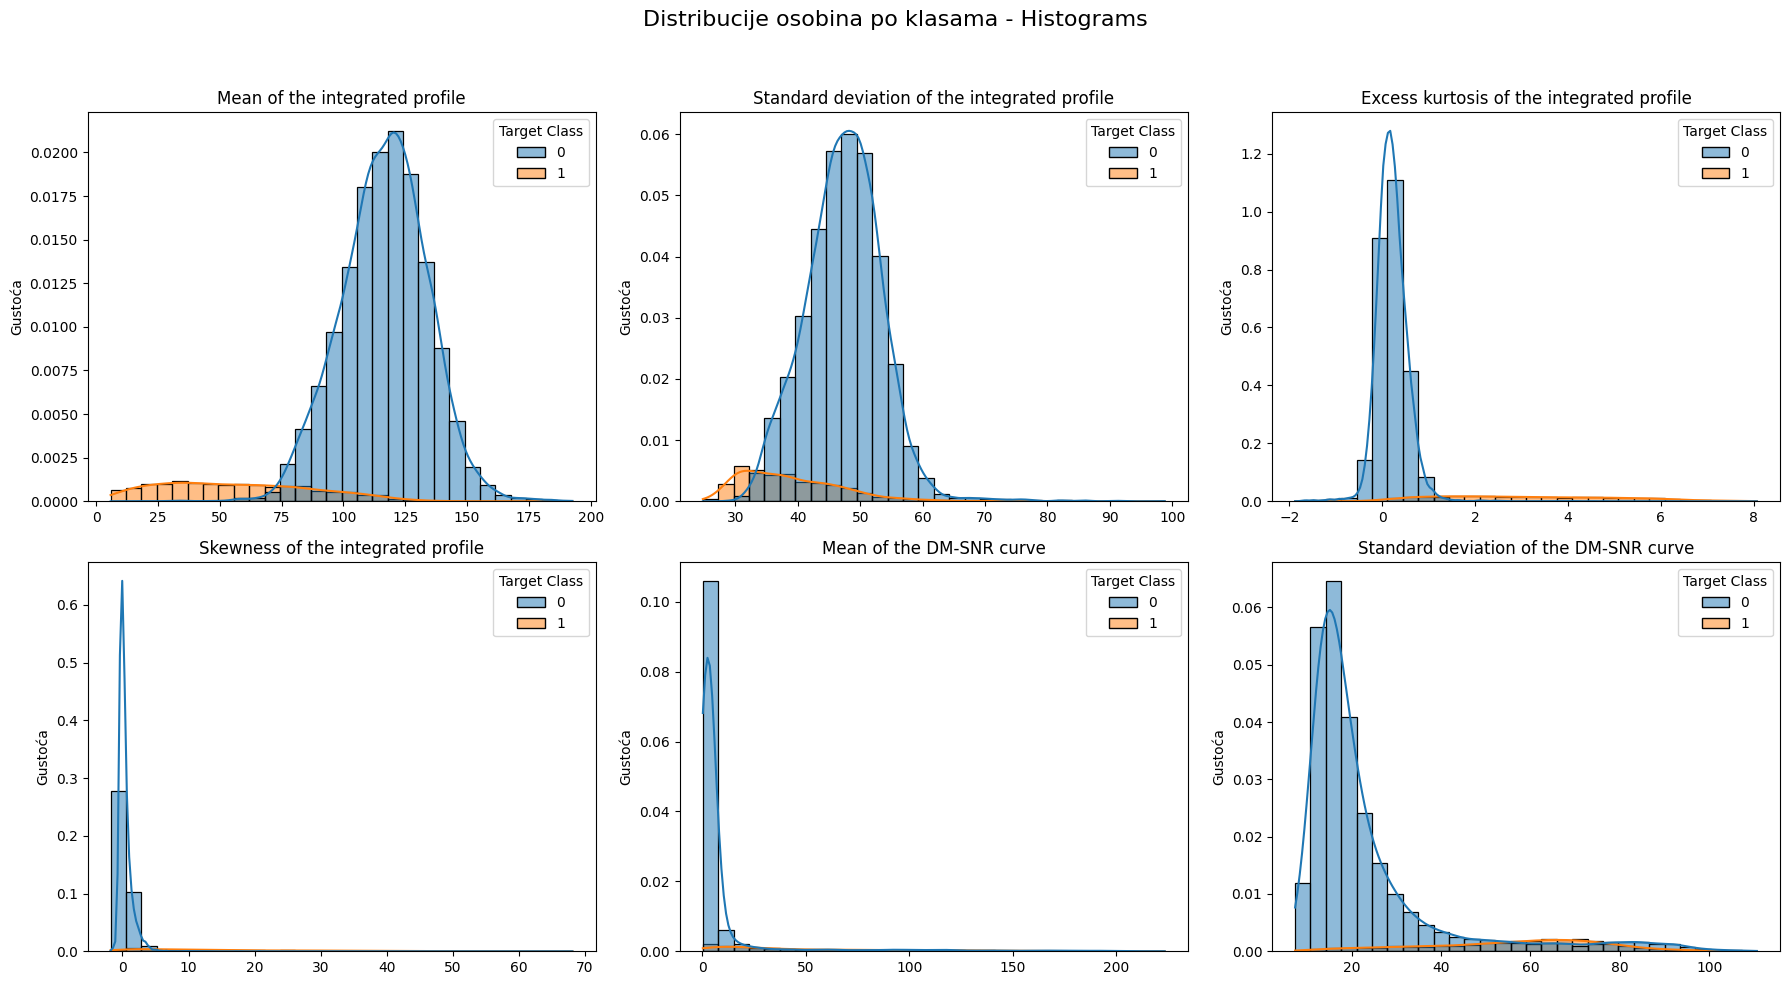

In [ ]:
atributi = [
    "Mean of the integrated profile",
    "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard deviation of the DM-SNR curve"
]


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribucije osobina po klasama - Histograms", fontsize=16)

for i, atribut in enumerate(atributi):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=df, x=atribut, hue="Target Class", kde=True, stat="density", bins=30, ax=ax)
    ax.set_title(atribut)
    ax.set_xlabel("")
    ax.set_ylabel("Gustoća")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
print("\nStatistički podaci za svaki atribut po klasama:\n")

for atribut in atributi:
    print(f"--- {atribut} ---")
    for klasa in df["Target Class"].unique():
        podaci = df[df["Target Class"] == klasa][atribut]
        mean = podaci.mean()
        std = podaci.std()
        skew = stats.skew(podaci)
        kurt = stats.kurtosis(podaci)
        print(f"Klasa {klasa}:")
        print(f"  Srednja vrijednost (mean): {mean:.3f}")
        print(f"  Standardna devijacija (std): {std:.3f}")
        print(f"  Asimetrija (skewness): {skew:.3f}")
        print(f"  Izbocenost (excess kurtosis): {kurt:.3f}")
    print()


Statistički podaci za svaki atribut po klasama:

--- Mean of the integrated profile ---
Klasa 0:
  Srednja vrijednost (mean): 116.563
  Standardna devijacija (std): 17.476
  Asimetrija (skewness): -0.104
  Izbocenost (excess kurtosis): 0.366
Klasa 1:
  Srednja vrijednost (mean): 56.691
  Standardna devijacija (std): 30.008
  Asimetrija (skewness): 0.308
  Izbocenost (excess kurtosis): -0.810

--- Standard deviation of the integrated profile ---
Klasa 0:
  Srednja vrijednost (mean): 47.340
  Standardna devijacija (std): 6.183
  Asimetrija (skewness): 0.427
  Izbocenost (excess kurtosis): 2.353
Klasa 1:
  Srednja vrijednost (mean): 38.711
  Standardna devijacija (std): 8.034
  Asimetrija (skewness): 1.036
  Izbocenost (excess kurtosis): 1.653

--- Excess kurtosis of the integrated profile ---
Klasa 0:
  Srednja vrijednost (mean): 0.210
  Standardna devijacija (std): 0.335
  Asimetrija (skewness): 0.971
  Izbocenost (excess kurtosis): 11.374
Klasa 1:
  Srednja vrijednost (mean): 3.131
  

Podaci pokazuju značajne razlike u srednjoj vrijednosti i obliku distribucije između klasa 0 i 1 za sve analizirane osobine. Klasa 1 ima uglavnom veći raspon i veću varijabilnost vrijednosti, dok klasa 0 često pokazuje izraženiju asimetriju i visoku izbočenost, što znači da su njeni podaci koncentrisaniji s izraženim ekstremnim vrijednostima u repovima distribucije.

Zbog izraženih razlika u distribuciji osobina između klase 0 i klase 1, modeli mogu postići visoku ukupnu preciznost i tačnost i bez dodatnih metoda balansiranja podataka, što ćemo demonstrirati u nastavku. Ipak, s obzirom na to da je klasa 1 znatno rjeđa u skupu podataka i da je njena detekcija izazovnija, a pritom ima ključnu važnost, jer svaki propušteni slučaj klase 1 može predstavljati značajan gubitak vrijednih informacija, ne možemo se osloniti isključivo na ukupnu tačnost. Zbog toga ćemo se fokusirati na poboljšanje mjera osjetljivosti (recalla) i druge metrike za klasu 1 kroz primjenu dodatnih tehnika koje omogućavaju da povećamo prepoznavanje pripadnika manje zastupljene klase, čime ćemo postići bolje rezultate u praksi, naročito u kontekstu značaja pravilne klasifikacije klase 1. O detaljima ovih pristupa i njihovim efektima pisaćemo u nastavku.

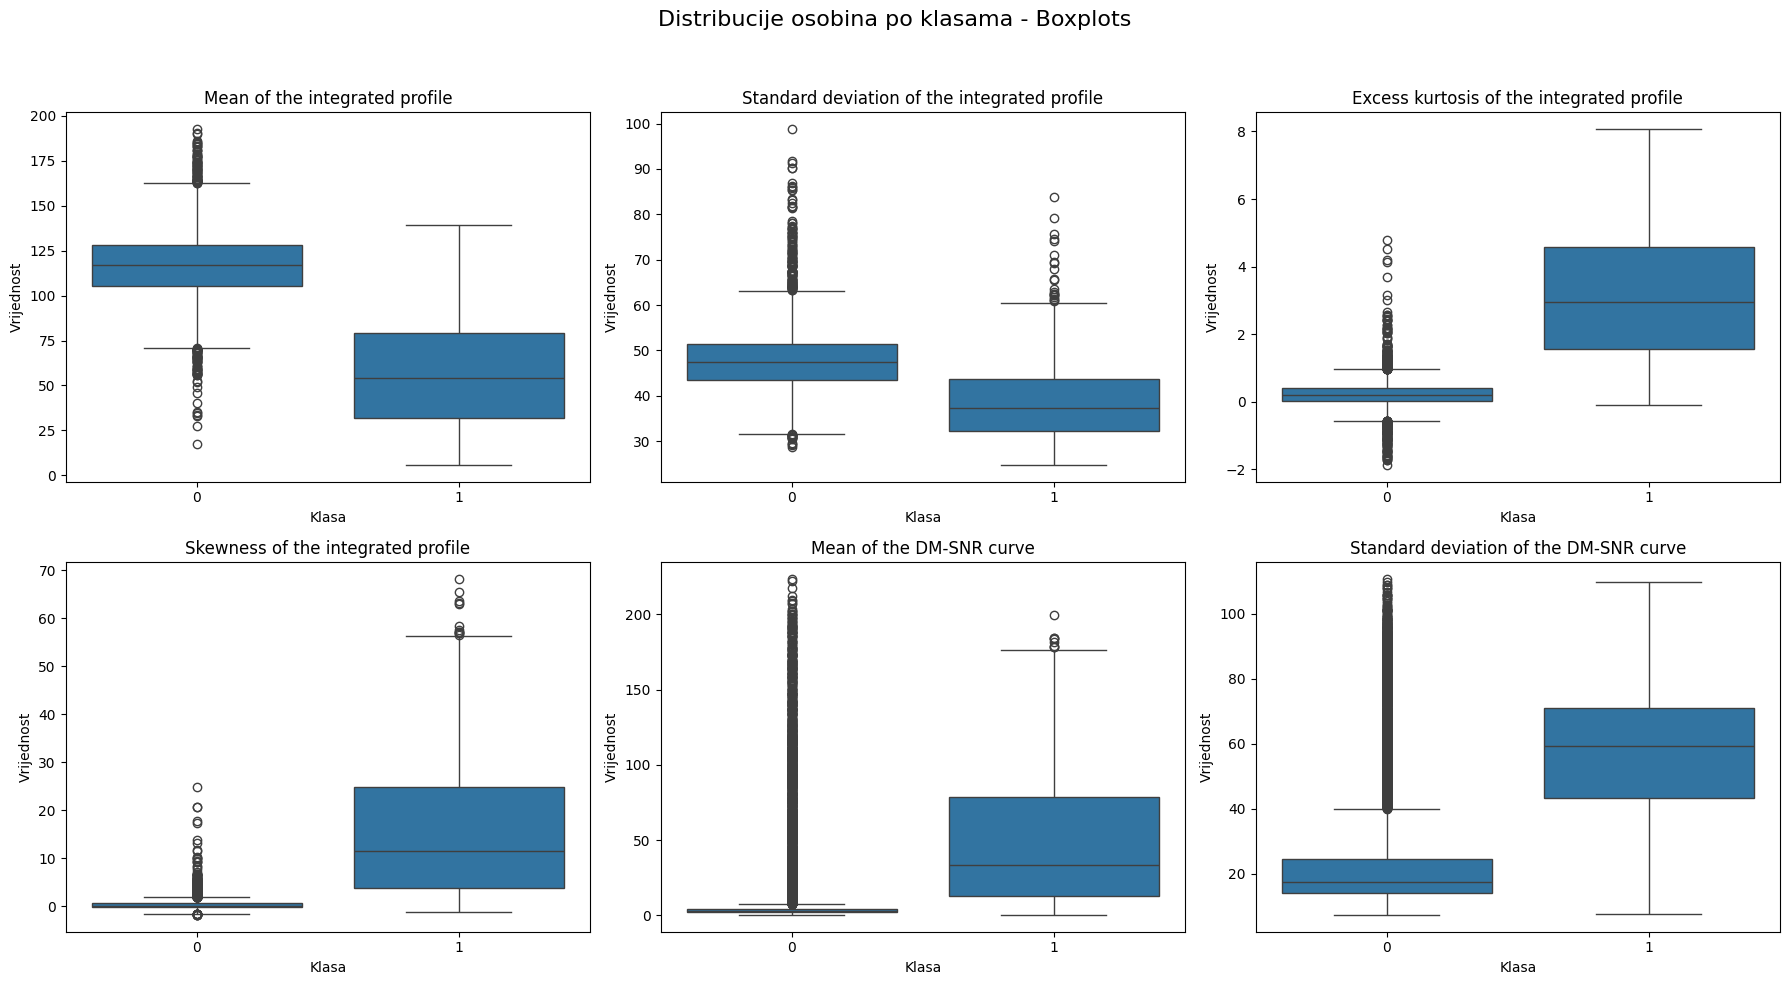


Analiza boxplotova i deskriptivne statistike po klasama:

Mean of the integrated profile:
                count        mean        std        min         25%  \
Target Class                                                          
0             16259.0  116.562726  17.475932  17.210938  105.253906   
1              1639.0   56.690608  30.007707   5.812500   31.777344   

                     50%         75%         max  
Target Class                                      
0             117.257812  128.285156  192.617188  
1              54.296875   79.277344  139.257812  

Standard deviation of the integrated profile:
                count       mean       std        min        25%        50%  \
Target Class                                                                  
0             16259.0  47.339741  6.182929  28.698714  43.384645  47.485647   
1              1639.0  38.710598  8.033614  24.772042  32.284803  37.341297   

                    75%        max  
Target Class       

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribucije osobina po klasama - Boxplots", fontsize=16)

for i, atribut in enumerate(atributi):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x="Target Class", y=atribut, data=df, ax=ax)
    ax.set_title(atribut)
    ax.set_xlabel("Klasa")
    ax.set_ylabel("Vrijednost")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n" + "="*60)
print("Analiza boxplotova i deskriptivne statistike po klasama:\n")
for atribut in atributi:
    print(f"{atribut}:")
    print(df.groupby("Target Class")[atribut].describe())
    print()

#Analiza
Analiza statističkih podataka za najvažnije atribute pulsara i ne-pulsara pokazuje značajne razlike između dvije klase. Mean of the integrated profile (srednja vrijednost integrisanog profila) je znatno viša kod ne-pulsara (116.56) u odnosu na pulsare (56.69), dok je standardna devijacija veća za pulsare. Standardna devijacija integrisanog profila mjeri koliko se jačina signala mijenja oko prosječne vrijednosti, što može biti indikacija složenosti signala.

Kod atributa Excess kurtosis of the integrated profile i Skewness of the integrated profile, pulsari pokazuju znatno veće srednje vrijednosti (3.13 i 15.55) u poređenju sa ne-pulsarima (0.21 i 0.38). Ove vrijednosti ukazuju na izraženiju asimetriju i "težinske" repove distribucije signala kod pulsara, odnosno da signali pulsara imaju neobične, oštre vrhove i produžene repove u distribuciji što je karakteristično za njihove fizičke fenomene. Velike razlike u ovim statističkim osobinama između klasa omogućavaju modelima mašinskog učenja lakše razlikovanje pulsara od ne-pulsara, što može značajno doprinijeti povećanju tačnosti klasifikacije.

Također, srednja vrijednost i standardna devijacija atributa Mean of the DM-SNR curve i Standard deviation of the DM-SNR curve su znatno veće kod pulsara, što potvrđuje veću varijabilnost i intenzitet signala povezanih sa pulsarima. Ove karakteristike opisuju snagu i varijabilnost signala u odnosu na šum, mjereno kroz različite vrijednosti disperzije (DM), što je ključno za identifikaciju pulsara.

Ovi podaci jasno potvrđuju da se pulsari i ne-pulsari razlikuju po nekoliko ključnih statističkih karakteristika, što je vrlo važno za njihovu pouzdanu klasifikaciju.

#Pripremni koraci za treniranje modela

Odvajanje ulaznih podataka (X) i ciljne klase (y)

In [ ]:
X = df.drop("Target Class", axis=1)
y = df["Target Class"]

Sada ćemo izvršiti podjelu podataka na trening i test skupove.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Trening skup:", X_train.shape)
print("Test skup:", X_test.shape)

Trening skup: (14318, 8)
Test skup: (3580, 8)


Pogledajmo sada uravnoteženost klasa u svakom od skupova.

Trening skup - Broj instanci po klasi:
Target Class
0    13007
1     1311
Name: count, dtype: int64
Trening skup - Procentualna distribucija:
Target Class
0    90.84
1     9.16
Name: proportion, dtype: float64%



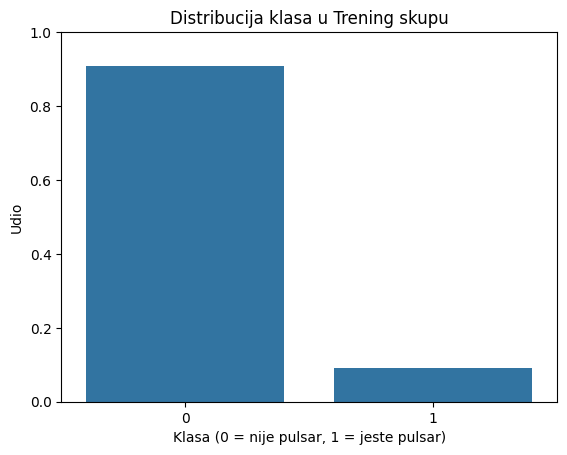

Test skup - Broj instanci po klasi:
Target Class
0    3252
1     328
Name: count, dtype: int64
Test skup - Procentualna distribucija:
Target Class
0    90.84
1     9.16
Name: proportion, dtype: float64%



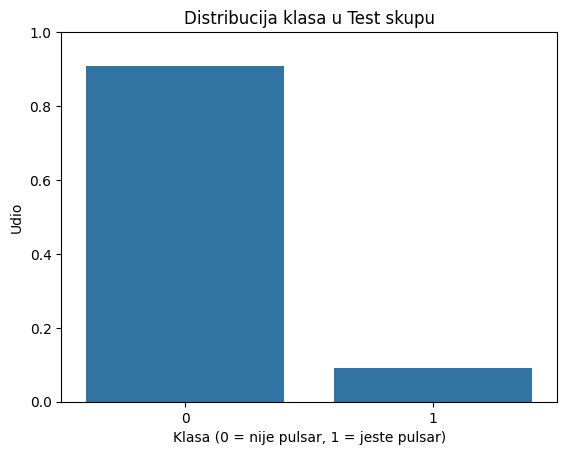

In [ ]:
def prikazi_distribuciju(y, naziv_skupa):
    distribucija = y.value_counts(normalize=True)
    print(f"{naziv_skupa} skup - Broj instanci po klasi:\n{y.value_counts()}")
    print(f"{naziv_skupa} skup - Procentualna distribucija:\n{(distribucija * 100).round(2)}%\n")

    sns.barplot(x=distribucija.index, y=distribucija.values)
    plt.title(f"Distribucija klasa u {naziv_skupa} skupu")
    plt.xlabel("Klasa (0 = nije pulsar, 1 = jeste pulsar)")
    plt.ylabel("Udio")
    plt.ylim(0, 1)
    plt.show()

prikazi_distribuciju(y_train, "Trening")
prikazi_distribuciju(y_test, "Test")

Nakon podjele podataka na dva skupa, na osnovu izlaza funkcije prikazi_distribuciju(), jasno se vidi da je naš skup podataka izrazito nebalansiran. Znatno je više instanci koje pripadaju klasi 0 (nije pulsar) u odnosu na klasu 1 (jeste pulsar).

Ovakva neuravnoteženost može negativno uticati na performanse klasifikacionih modela, jer većina algoritama ima tendenciju da favorizuje većinsku klasu, pri čemu često zanemaruje tačnost predikcije manjinske klase – što je u ovom problemu od posebne važnosti. Naš cilj je pouzdano identifikovati pulsare, pa čak i mali broj lažno negativnih predikcija (tj. stvarnih pulsara koji nisu prepoznati) može biti ozbiljan problem.

Zbog toga je ova informacija o neravnoteži klasa od izrazite važnosti i u velikoj mjeri će oblikovati pristup u daljem razvoju projekta. Biće potrebno primijeniti odgovarajuće tehnike balansiranja skupa podataka, kao i posebno obratiti pažnju na metrike evaluacije koje adekvatno reflektuju performanse na manjinskoj klasi.

Ovom analizom završavamo pregled skupa podataka i prelazimo na sljedeću fazu našeg projekta – izgradnju i evaluaciju modela.

#Evaluacija modela
U nastavku projekta fokusirat ćemo se na evaluaciju različitih algoritama mašinskog učenja s ciljem klasifikacije pulsara. Testirat ćemo sljedeće modele: **Logistic Regression**, **Support Vector Machine (SVM)**, **K-Nearest Neighbors (KNN)**, **Decision Tree**, **Random Forest**, **XGBoost**, kao i jednostavne **neuronske mreže**.

Za procjenu performansi svakog modela koristit ćemo četiri ključne metrike: **accuracy**, **precision**, **recall** i **F1-score**, koje će nam pomoći da sagledamo koliko je model uspješan u prepoznavanju klasa, a posebno u detekciji manjinske klase tj. klase pulsara.


Kako bismo na standardiziran način evaluirali performanse različitih klasifikasionih modela, definisana je funkcija evaluate_model(). Ova funkcija prikazuje accuracy, classification report (precision, recall, F1-score) i confusion matrix, što omogućava detaljnu procjenu sposobnosti modela da izvši klasifikaciju.

In [ ]:
def evaluate_model(model, X, y, name):
    global metrics
    y_pred = model.predict(X)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1 Score"].append(f1)

    print(f"\nModel: {name}")
    print("Tačnost:", acc)
    print(classification_report(y, y_pred))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return acc

#Tok projekta i pristup treniranju modela

Klasna neuravnoteženost predstavlja značajan izazov u problemu prepoznavanja pulsara, jer je zastupljenost pozitivnih primjera (pulsara) znatno manja u odnosu na negativne primjere. Ovo može dovesti do modela koji imaju visoku tačnost, ali loše prepoznaju manjinsku klasu, što je nepoželjno u našem slučaju.

Zbog toga ćemo treniranje modela provoditi kroz tri ključne faze:

Treniranje modela bez preprocesiranja podataka — koristit ćemo originalni skup podataka bez dodatnog preprocesiranja kako bismo sagledali osnovne performanse modela i njihov odgovor na neuravnotežene podatke.

Treniranje modela na skaliranim podacima — primijenit ćemo standardizaciju atributa pomoću skaliranja kako bismo unaprijedili rad algoritama koji su osjetljivi na različite skale podataka.

Treniranje modela na balansiranim podacima pomoću SMOTE tehnike — upotrijebit ćemo tehniku sintetičkog balansiranja manjinske klase kako bismo poboljšali učenje modela i postigli pravedniju raspodjelu performansi među klasama.




#  Faza 1 : Treniranje modela bez preprocesiranja podataka

Cilj ove faze je da koristimo izvorne, neobrađene podatke kako bismo potvrdili hipotezu da neuravnoteženost podataka može rezultirati visokom ukupnom tačnošću modela, dok istovremeno negativno utiče na druge ključne metrike performansi, kao što su recall, precision i F1-score, posebno u prepoznavanju manjinske klase. Ovaj pristup nam takođe omogućava da uspostavimo početnu referentnu tačku za performanse svakog modela prije nego što primijenimo složenije tehnike poput skaliranja i balansiranja podataka. Na taj način dobijamo jasnu sliku o ponašanju algoritama na sirovim podacima, što je ključno za informisano donošenje odluka o daljim koracima u obradi i unapređenju modela.


--- Evaluacija na test skupu (SVM) ---

Model: SVM
Tačnost: 0.9762569832402235
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.98      0.76      0.85       328

    accuracy                           0.98      3580
   macro avg       0.98      0.88      0.92      3580
weighted avg       0.98      0.98      0.97      3580



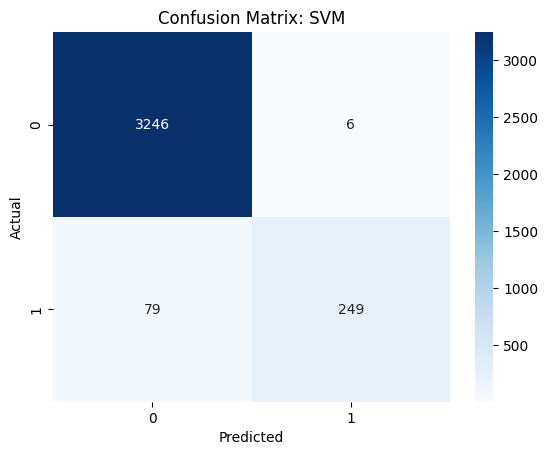


--- Evaluacija na test skupu (Logistic Regression) ---

Model: LR
Tačnost: 0.9798882681564246
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.83      0.88       328

    accuracy                           0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



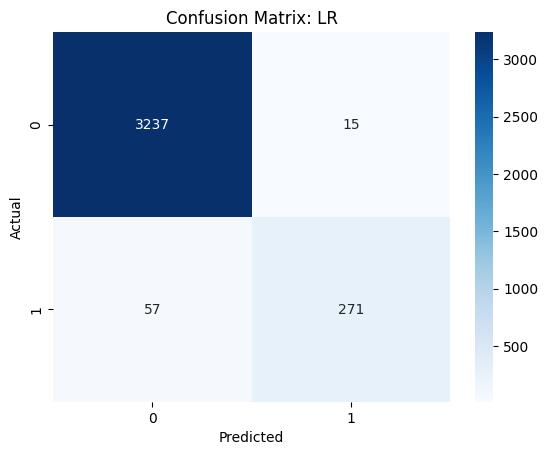


--- Evaluacija na test skupu (KNN) ---

Model: KNN
Tačnost: 0.9743016759776536
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.91      0.80      0.85       328

    accuracy                           0.97      3580
   macro avg       0.94      0.90      0.92      3580
weighted avg       0.97      0.97      0.97      3580



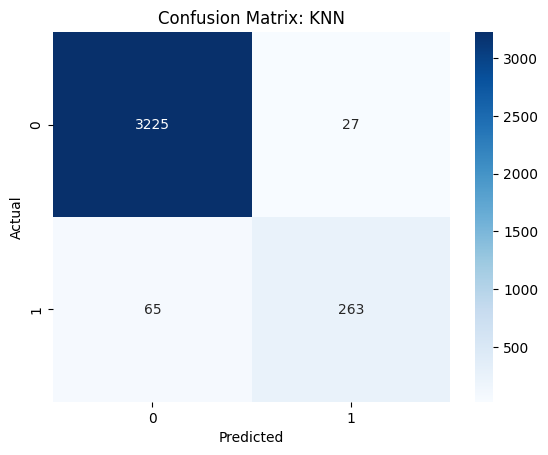


--- Evaluacija na test skupu (Decision Tree) ---

Model: DT
Tačnost: 0.9667597765363128
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3252
           1       0.80      0.84      0.82       328

    accuracy                           0.97      3580
   macro avg       0.89      0.91      0.90      3580
weighted avg       0.97      0.97      0.97      3580



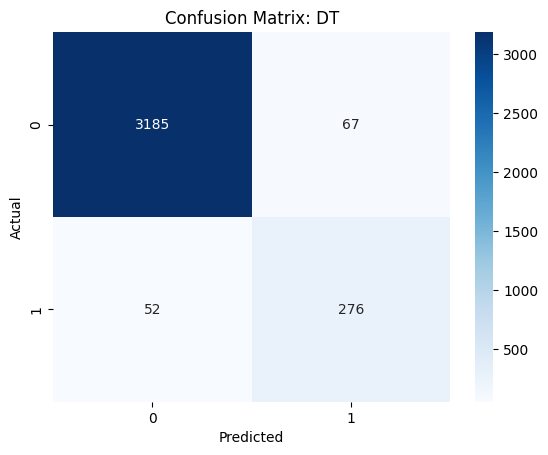


--- Evaluacija na test skupu (Random Forest) ---

Model: RF
Tačnost: 0.9818435754189944
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.93      0.86      0.90       328

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



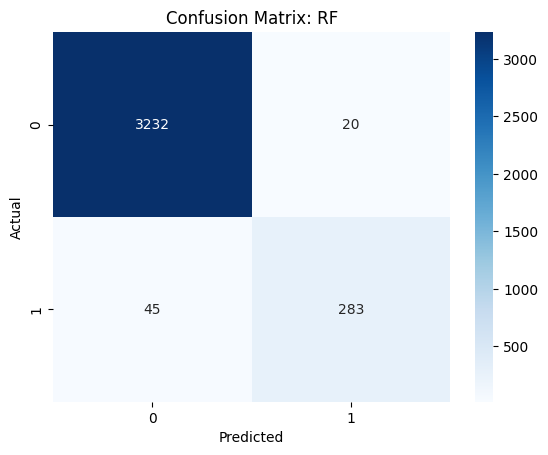


--- Evaluacija na test skupu (XGBoost) ---

Model: XGB
Tačnost: 0.9787709497206704
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.90      0.87      0.88       328

    accuracy                           0.98      3580
   macro avg       0.94      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



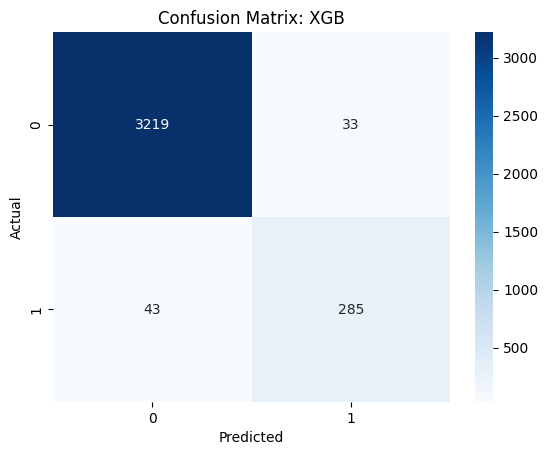

/tmp/ipython-input-13-4228136668.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis", ax=axes[i][j])
/tmp/ipython-input-13-4228136668.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis", ax=axes[i][j])
/tmp/ipython-input-13-4228136668.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis", ax=axes[i][j])
/tmp/ipython-input-13-4228136668.py:45: FutureWarning: 

Passing `palette

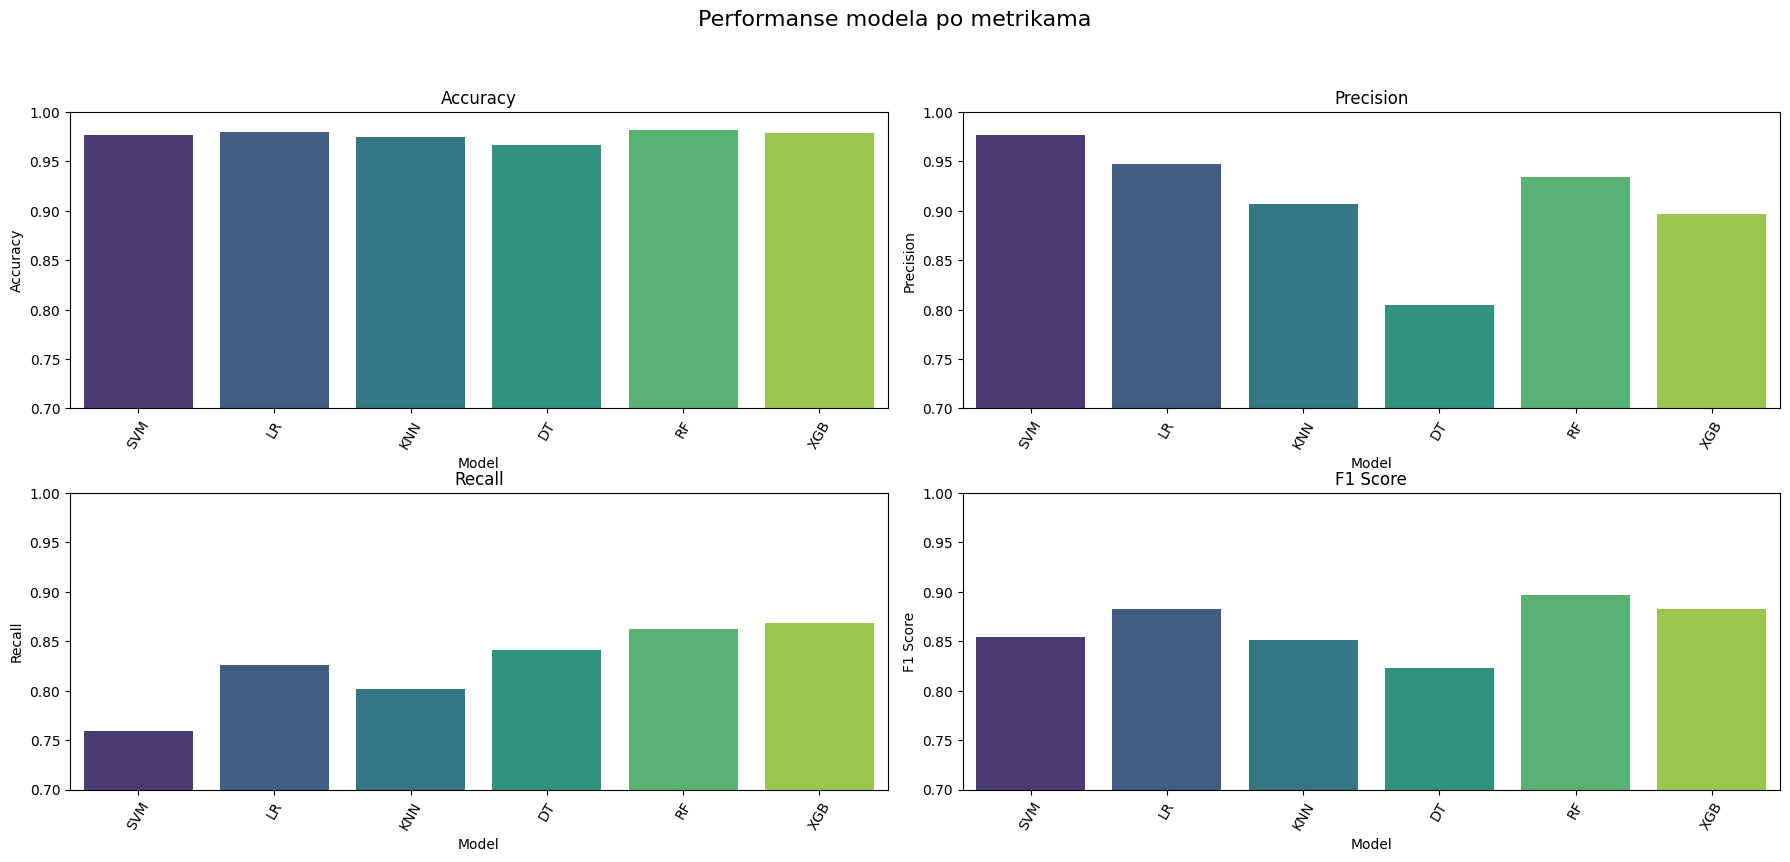

In [ ]:
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

short_names = {
    "SVM": "SVM",
    "Logistic Regression": "LR",
    "KNN": "KNN",
    "Decision Tree": "DT",
    "Random Forest": "RF",
    "XGBoost": "XGB"
}

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    print(f"\n--- Evaluacija na test skupu ({name}) ---")
    acc = evaluate_model(model, X_test, y_test, short_names[name])
    accuracies[name] = acc

df_metrics = pd.DataFrame(metrics)

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Performanse modela po metrikama", fontsize=16)

metrics_list = ["Accuracy", "Precision", "Recall", "F1 Score"]
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for metric, (i, j) in zip(metrics_list, positions):
    sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis", ax=axes[i][j])
    axes[i][j].set_title(metric)
    axes[i][j].set_ylim(0.7, 1)
    axes[i][j].tick_params(axis='x', rotation=60)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.subplots_adjust(bottom=0.2)
plt.show()

#Analiza
Na osnovu poređenja šest različitih algoritama za binarnu klasifikaciju na HTRU2 skupu podataka, jasno se uočavaju razlike u ponašanju modela na trening i test skupu, što omogućava analizu generalizacione sposobnosti i eventualne pojave overfittinga. Najstabilnije performanse pokazali su SVM, Logistička regresija i KNN. Ovi modeli ostvarili su visoku tačnost na oba skupa (iznad 97%) bez značajnog pada performansi na test skupu, što ukazuje na dobru generalizaciju. Konkretno, SVM i logistička regresija su održali gotovo istu tačnost i F1-score na oba skupa, dok je kod KNN-a primijećen tek neznatan pad u F1-score vrijednosti za pozitivnu klasu (1).

S druge strane, modeli poput Decision Tree i Random Forest pokazuju znakove overfittinga. Ovi modeli su ostvarili savršenu tačnost (100%) na trening skupu, ali su zabilježili pad performansi na test skupu, posebno u klasifikaciji manjinske klase (1). Iako je Random Forest i dalje postigao visoku tačnost na test skupu (98%), razlika između trening i test performansi, naročito kod klase 1, ukazuje na tendenciju preučenja. XGBoost, iako vrlo snažan model, također pokazuje blagi overfit – sa skoro savršenim rezultatima na trening skupu i blagim padom tačnosti i F1-score na testu.

U zaključku, za ovaj problem, SVM i logistička regresija predstavljaju najuravnoteženije i najrobustnije modele, s visokim performansama i minimalnim znakovima overfittinga. Dok su modeli poput Random Forest i XGBoost i dalje veoma tačni, njihova prevelika prilagodba trening podacima može biti potencijalni problem u produkcionom okruženju gdje se očekuje dobra generalizacija na nove podatke.

# Skaliranje podataka

U nastavku ćemo izvršiti skaliranje podataka kako bismo pripremili ulazne osobine za treniranje modela. Za skaliranje koristimo StandardScaler, koji transformiše podatke tako da svaka osobina ima srednju vrijednost 0 i standardnu devijaciju 1.

Ova standardizacija je važna jer osigurava da sve osobine imaju jednak doprinos u procesu učenja, što značajno utiče na performanse određenih algoritama, poput SVM-a i KNN-a, koji su osjetljivi na različite skale podataka.

Nakon skaliranja, testirat ćemo performanse šest različitih modela nad ovako pripremljenim podacima.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Faza 2 : Treniranje modela sa skaliranim podacima

U našem projektu, motivacija za treniranje modela na skaliranim podacima proizilazi iz potrebe da se obezbijedi što ujednačeniji doprinos svih atributa u procesu učenja. Budući da različiti atributi mogu imati veoma različite vrijednosti i mjere, neki algoritmi mašinskog učenja, poput SVM-a, KNN-a i logističke regresije, mogu biti osjetljivi na ove razlike, što može negativno utjecati na njihovu preciznost i stabilnost.


Model: SVM sa skaliranim podacima (test skup)
Tačnost: 0.9807262569832402
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.84      0.89       328

    accuracy                           0.98      3580
   macro avg       0.97      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



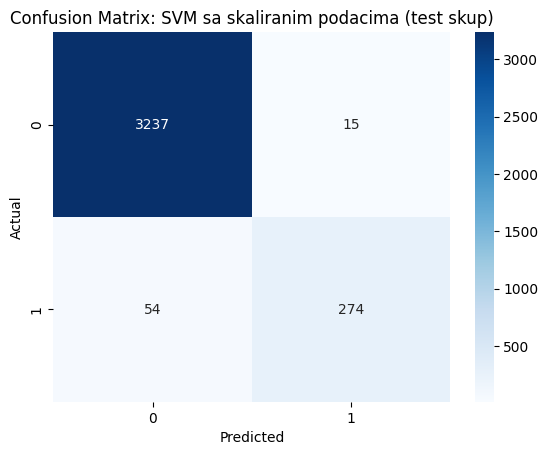


Model: Logistic Regression sa skaliranim podacima (test skup)
Tačnost: 0.979608938547486
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.94      0.83      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



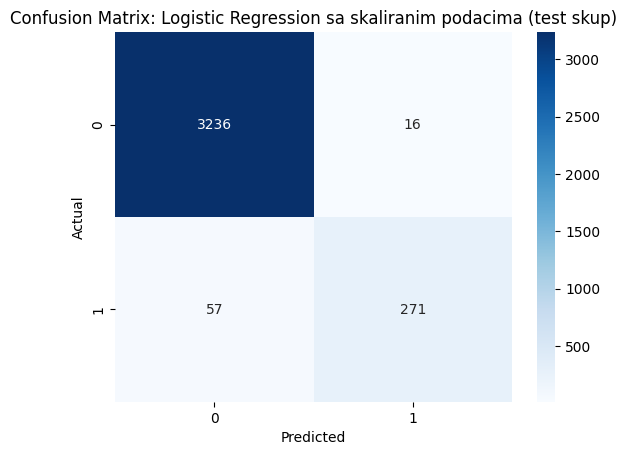


Model: K-Nearest Neighbors sa skaliranim podacima (test skup)
Tačnost: 0.9804469273743017
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.85      0.89       328

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



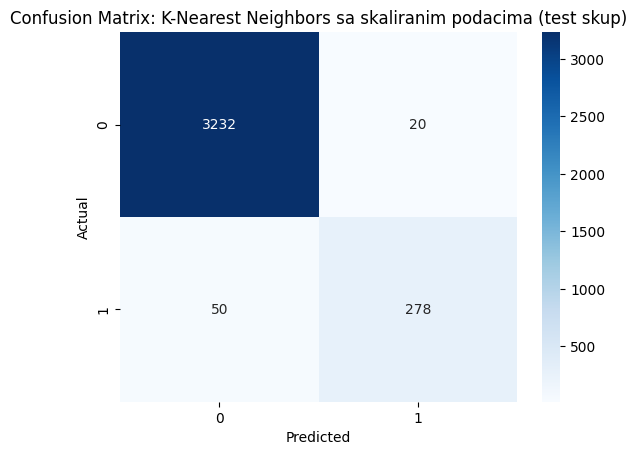


Model: Decision Tree sa skaliranim podacima (test skup)
Tačnost: 0.9684357541899441
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3252
           1       0.82      0.83      0.83       328

    accuracy                           0.97      3580
   macro avg       0.90      0.91      0.91      3580
weighted avg       0.97      0.97      0.97      3580



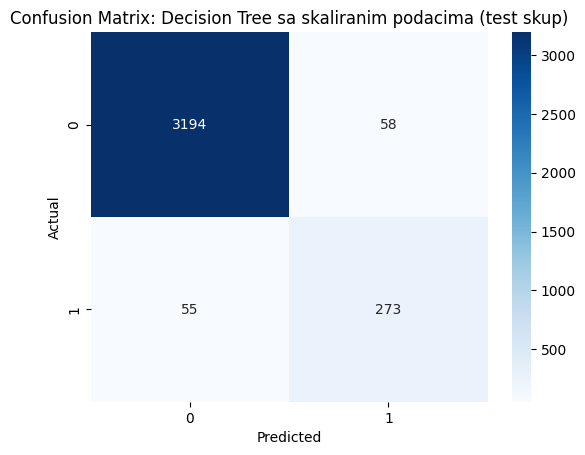


Model: Random Forest sa skaliranim podacima (test skup)
Tačnost: 0.982122905027933
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.93      0.87      0.90       328

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



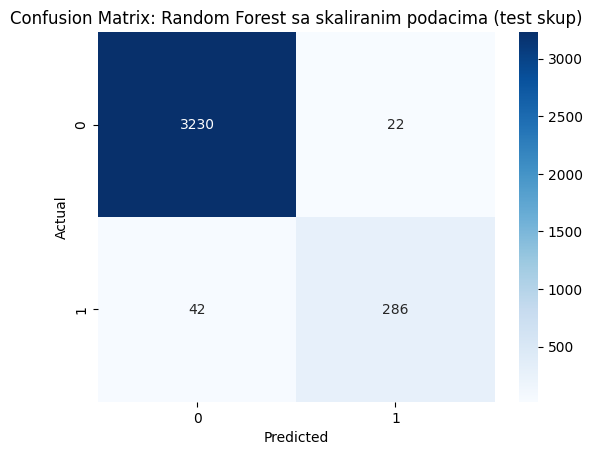

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:59:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost sa skaliranim podacima (test skup)
Tačnost: 0.9787709497206704
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.90      0.87      0.88       328

    accuracy                           0.98      3580
   macro avg       0.94      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



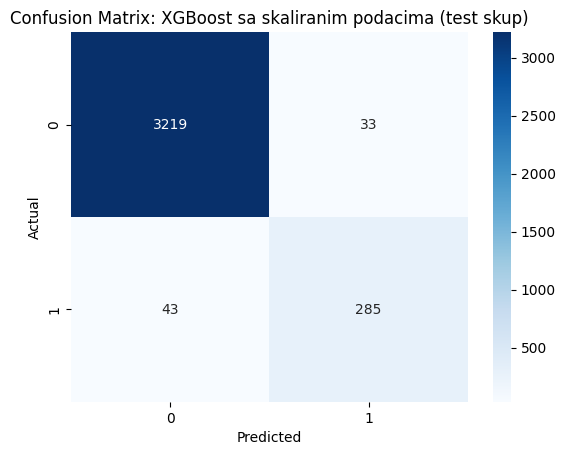

0.9787709497206704

In [ ]:
# SVM
svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
evaluate_model(svm_scaled, X_test_scaled, y_test, "SVM sa skaliranim podacima (test skup)")

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
evaluate_model(logreg, X_test_scaled, y_test, "Logistic Regression sa skaliranim podacima (test skup)")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
evaluate_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors sa skaliranim podacima (test skup)")

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
evaluate_model(tree, X_test_scaled, y_test, "Decision Tree sa skaliranim podacima (test skup)")

# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)
evaluate_model(forest, X_test_scaled, y_test, "Random Forest sa skaliranim podacima (test skup)")

# XGBoost
xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train_scaled, y_train)
evaluate_model(xgb, X_test_scaled, y_test, "XGBoost sa skaliranim podacima (test skup)")

Vidjeli smo kako modeli rade nad raw  podacima i potvrdili našu hipotezu o velikim tačnostima, ali lošim ostalim metrikama, zatim smo prešli na skalirane podatke bez dodatnih optimizacija, te prikazali dobijene podatke. Slijedi sljedeća faza

# Faza 3:  Treniranje modela na balansiranim podacima pomoću SMOTE (Synthetic Minority Oversampling Technique)

U ovoj fazi koristimo SMOTE kako bismo proširili skup podataka sintetičkim primjerima manjinske klase. To pomaže modelima da bolje prepoznaju pulsare i smanjuje pristrasnost prema dominantnoj klasi. Skaliranje podataka prije SMOTE-a je ključno kako bi svi atributi imali jednaku težinu pri generisanju novih uzoraka i kako bi treniranje bilo efikasnije.


Za razliku od prethodnih faza gdje smo vršili osnovno treniranje modela, sada ćemo na ovim balansiranim podacima primijeniti detaljnu optimizaciju za svih šest algoritama. Cilj je pronaći najbolje konfiguracije koje će maksimizirati performanse i kvalitetu predikcije.

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

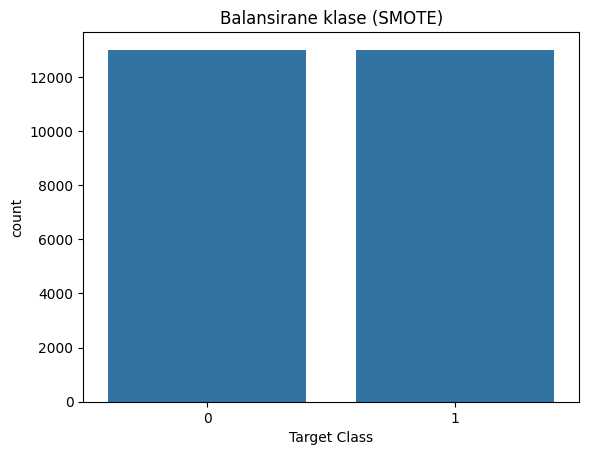

In [ ]:
sns.countplot(x=y_train_bal)
plt.title("Balansirane klase (SMOTE)")
plt.show()

Sa prikaza iznad jasno se vidi da smo primjenom SMOTE tehnike postigli balansiranost skupa podataka – broj instanci klase 0 (nije pulsar) i klase 1 (jeste pulsar) u trening skupu je sada jednak. Ova ravnoteža je ključna za efikasno treniranje modela jer omogućava algoritmima da jednako uče obrasce iz obje klase, čime se smanjuje pristrasnost prema većinskoj klasi i poboljšava sposobnost modela da tačno prepozna pulsare.

Prvi na redu je SVM algoritam. U našem radu je detaljno opisano kako ovaj algoritam funkcioniše, ali hajde da pokažemo na našem primjeru.


Model: SVM: skalirani + SMOTE (test skup)
Tačnost: 0.970391061452514
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3252
           1       0.79      0.91      0.85       328

    accuracy                           0.97      3580
   macro avg       0.89      0.95      0.92      3580
weighted avg       0.97      0.97      0.97      3580



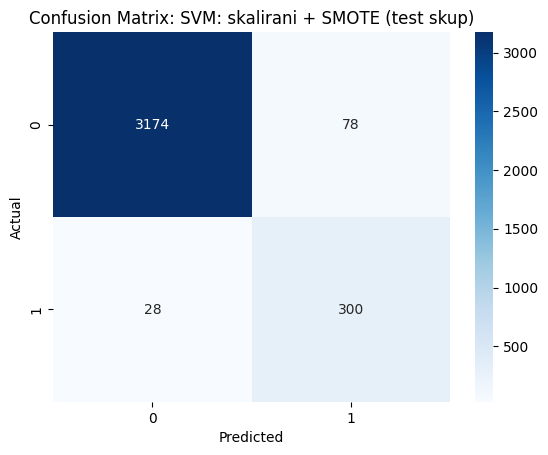

0.970391061452514

In [ ]:
svm_scaled_smote = SVC(kernel='rbf',  random_state=42)
svm_scaled_smote.fit(X_train_bal, y_train_bal)

evaluate_model(svm_scaled_smote, X_test_scaled, y_test, "SVM: skalirani + SMOTE (test skup)")

# Osvrt na rezultate
Accuracy isnosi 0.97039, približno 97%.
Dakle od ukupno 3580 primjera u test skupu, model je tačno klasificirao 97% njih. Možemo reći da je ovo jako dobra ukupna tačnost, ali hajde da vidimo i ostalo.

Confusion matrica prikazuje stvarne vrijednosti naspram predikcija.
Matrica nam pokazuje sljedeće


*  True Negatives(TN): 3155, negativni primjeri ispravno klasificirani kao ne-pulsari
*   False Positives (FP):28, negativni primjeri pogrešno klasificiran kao pozitivni(ne-pulsari kao pulsari).
*   False Negatives (FN): 78 – pozitivni primjeri pogrešno klasificirani kao negativni (pulsari kao ne-pulsari) , ovo je kritično u kontekstu otkrivanja pulsara.
*  True Positives (TP): 300 – pozitivni primjeri ispravno klasificirani kao pozitivni (tačno prepoznati pulsari).

Classification Report

###Klasa 0

* Precision: 0.99 – Od svih koji su predviđeni kao ne-pulsari, 99% su zaista ne-pulsari.
* Recall: 0.98 – Model je pronašao 98% ne-pulsara.
*  F1-score: 0.98 – Odličan balans preciznosti i odziva.

###Klasa 1


* Precision: 0.79 – Od svih koji su predviđeni kao pulsari, 78% su zaista pulsari.
* Recall: 0.91 – Model je pronašao 91% stvarnih pulsara. Znači, propustio je 9% njih (lažno negativni).
* F1-score: 0.85 – Pristojan, ali može se popraviti, posebno ako nam je cilj ne promašiti pulsare.

###Zaključak:
SVM model ima nisku preciznost kada je u pitanju klasa 1, ali to je prihvatljivo u našem slučaju jer je recall prioritet. Recall od 0.91 je veoma dobar rezultat. Ovo nam potvrđuje i F1-score koji iznosi 0.85 i pokazuje dobru ravnotežu između preciznosti i recalla.

###Model : SVM with Balanced Class Weight

Za prošli model radili smo balansiranje podataka koristeći SMOTE. SVC funkcija iz sklearn biblioteke omogućava korištenje parametra *class_weight='balanced'* koji vrši balansiranje.

To radimo jer defaultni SVM favorizuje većinske klase (klasa 0), zato ćemo dodati veću težinu klasi 1 (pulsari) kako bismo "kaznili" model kada je ne prepozna.


Model: SVM sa parametrom class_weight='balanced' (test skup)
Tačnost: 0.9717877094972067
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3252
           1       0.80      0.91      0.86       328

    accuracy                           0.97      3580
   macro avg       0.90      0.95      0.92      3580
weighted avg       0.97      0.97      0.97      3580



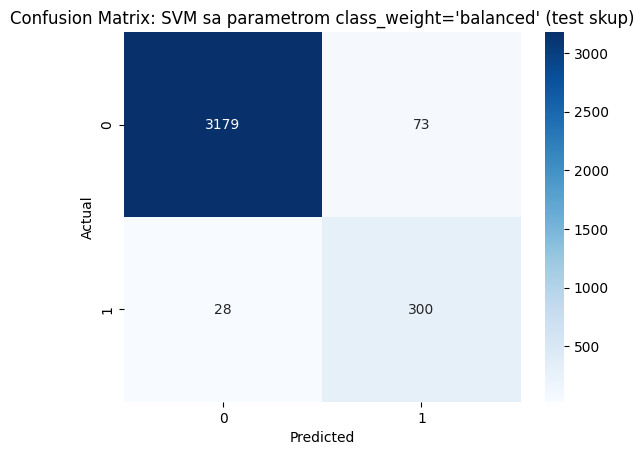

0.9717877094972067

In [ ]:
svm_balanced = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_balanced.fit(X_train_scaled, y_train)

evaluate_model(svm_balanced, X_test_scaled, y_test, "SVM sa parametrom class_weight='balanced' (test skup)")

#Analiza rezultata

### SVM Hyperparametar tuning (GridSearchCV)
SVM ima hiperparametre koji značajno utiču na rezultate. To su C:kontrola regulacije (kako C opada tako raste tolerancija na grešku) i gamma: kontrola uticaja pojedinačnih tačaka (kako gamma opada tako raste odlučujuća granica).
Cilj nam je pronaći najbolju kombinaciju hiperparametara za najbolji f1-score (balans recall + precision).

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ......................C=0.1, gamma=0.01

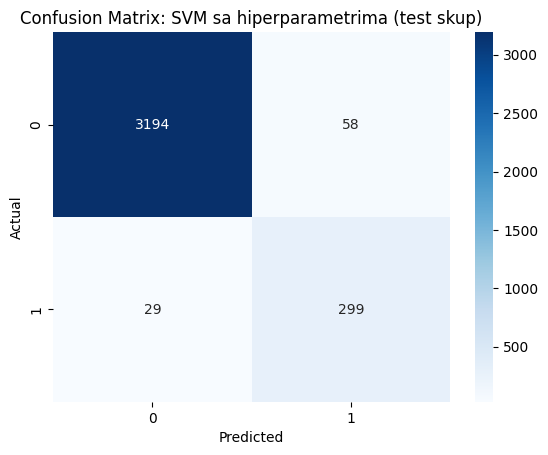

0.9756983240223464

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, scoring='f1', verbose=2)
grid.fit(X_train_scaled, y_train)

evaluate_model(grid.best_estimator_, X_test_scaled, y_test, "SVM sa hiperparametrima (test skup)")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.5s
[CV] END .................................C=1, kernel=linear; total time=   2.3s
[CV] END .................................C=1, kernel=linear; total time=   1.4s
[CV] END .................................C=1, kernel=linear; total time=   1.4s
[CV] END .................................C=1, kernel=linear; total time=   1.5s
[CV] END .................................C=1, kernel=linear; total time=   1.4s
[CV] END ................................C=10, kernel=linear; total time=   3.2s
[CV] END ................................C=10, ke

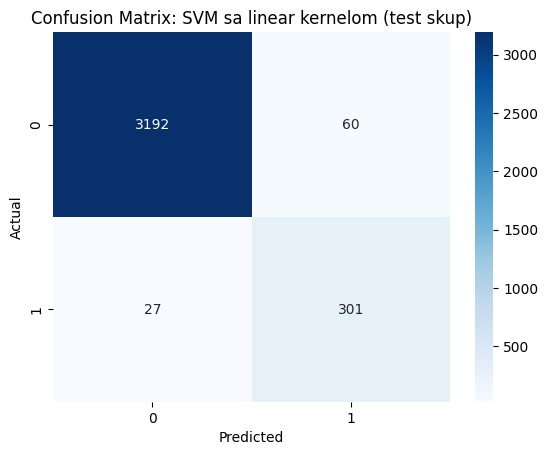

0.9756983240223464

In [ ]:
param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

grid_linear = GridSearchCV(SVC(class_weight='balanced'), param_grid_linear, cv=5, scoring='f1', verbose=2)
grid_linear.fit(X_train_scaled, y_train)

evaluate_model(grid_linear.best_estimator_, X_test_scaled, y_test, "SVM sa linear kernelom (test skup)")

Ovdje je i pogodno mjesto da napravimo usporedbu svih optimizacija i načina na koji smo predstavili model koristeći SVM.


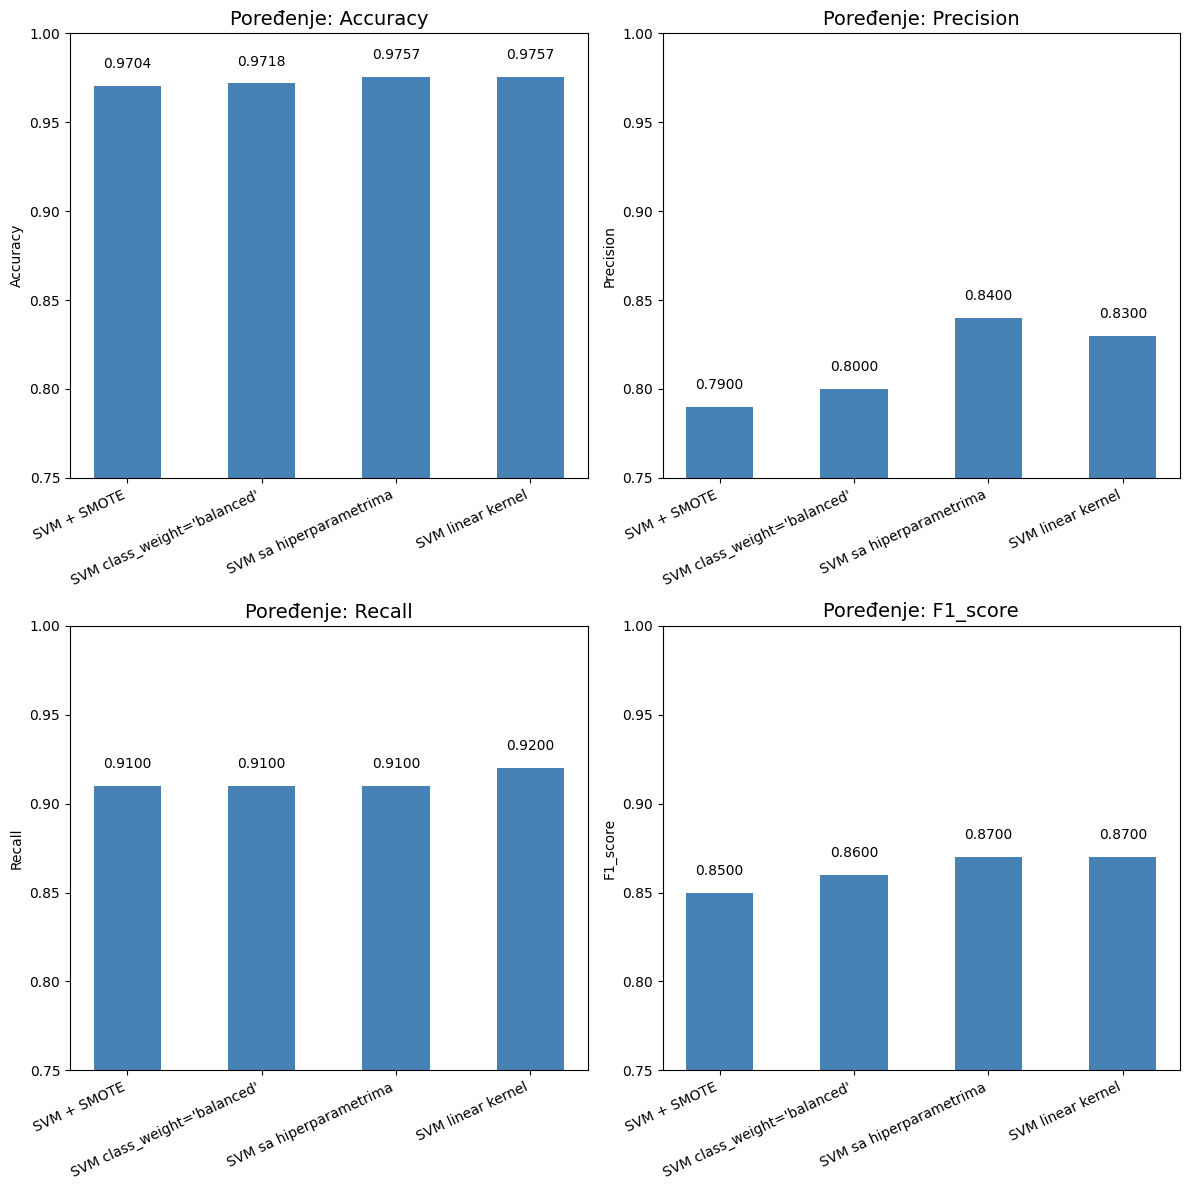

In [ ]:
svm_models = [
    "SVM + SMOTE",
    "SVM class_weight='balanced'",
    "SVM sa hiperparametrima",
    "SVM linear kernel"
]

results_svm = {
    'accuracy':   [0.9704, 0.9718, 0.9757, 0.9757],
    'precision':  [0.79,   0.80,   0.84,   0.83],
    'recall':     [0.91,   0.91,   0.91,   0.92],
    'f1_score':   [0.85,   0.86,   0.87,   0.87]
}

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(svm_models))
bar_width = 0.5

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x, results_svm[metric], width=bar_width, color='steelblue')
    for idx, val in enumerate(results_svm[metric]):
      ax.text(idx, val + 0.01, f"{val:.4f}", ha='center', fontsize=10)
    ax.set_title(f'Poređenje: {metric.capitalize()}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(svm_models, rotation=25, ha='right')
    ax.set_ylim(0.75, 1.0)
    ax.set_ylabel(metric.capitalize())


plt.tight_layout()
plt.show()

# Decision Tree algoritam


Model: Decision Tree: skalirani + SMOTE (test skup)
Tačnost: 0.9472067039106146
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3252
           1       0.66      0.87      0.75       328

    accuracy                           0.95      3580
   macro avg       0.82      0.91      0.86      3580
weighted avg       0.96      0.95      0.95      3580



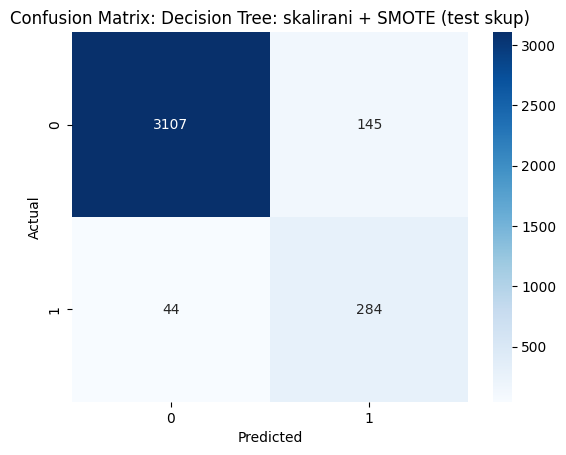

0.9472067039106146

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_bal, y_train_bal)

evaluate_model(dt_model, X_test_scaled, y_test, "Decision Tree: skalirani + SMOTE (test skup)")

# Decision Tree Hyperparameter tuning (GridSearchCV)

Optimizujemo model koristeći hiperparametre:

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ..criterion=gini, max_depth=3, min_samples_split=10; total time=   0.1s
[CV] END ..criterion=gini, max_depth=3, min_sam

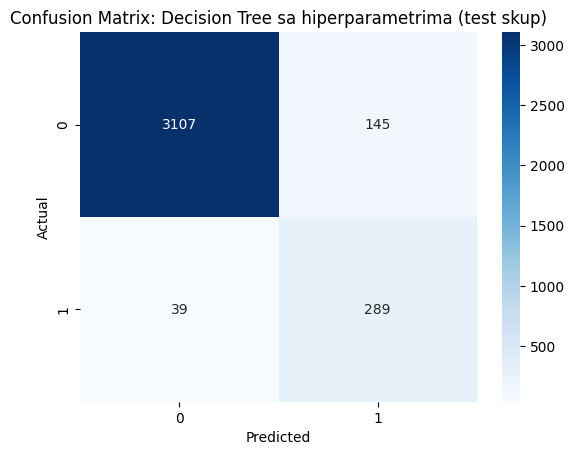

0.9486033519553073

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1', verbose=2)
grid_dt.fit(X_train_bal, y_train_bal)
evaluate_model(grid_dt.best_estimator_, X_test_scaled, y_test, "Decision Tree sa hiperparametrima (test skup)")

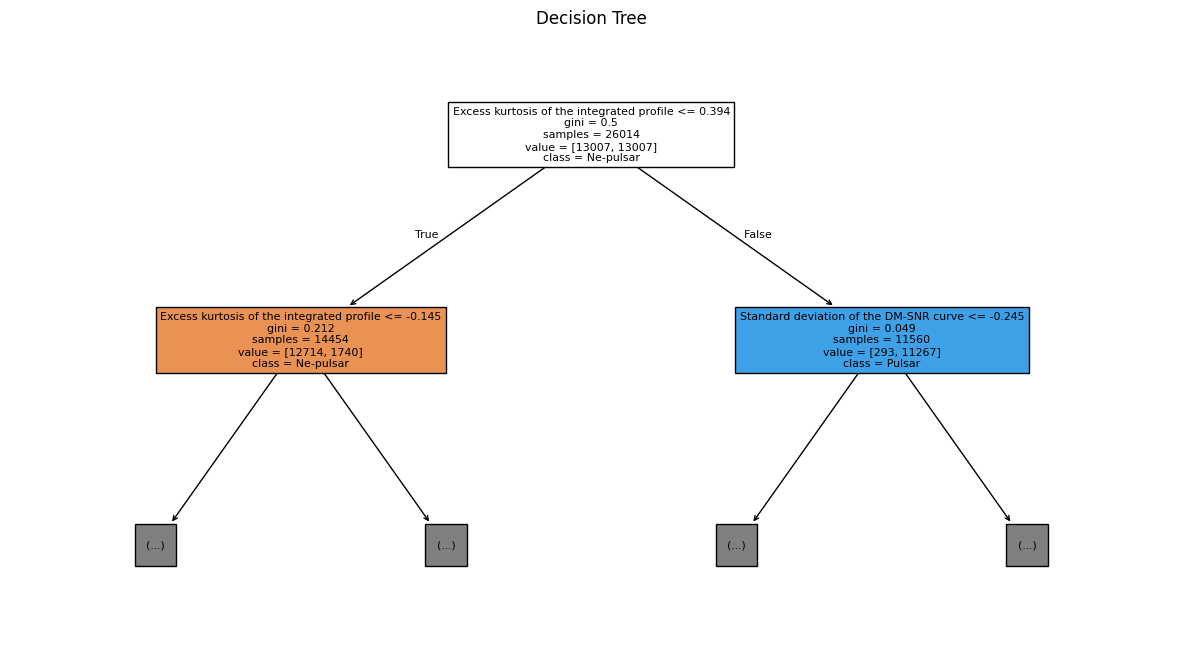

In [ ]:
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["Ne-pulsar", "Pulsar"], max_depth=1, filled=True)
plt.title("Decision Tree")
plt.show()

# Decision Tree sa f1_macro parametrom

Zanimljivo je vidjeti kako će GridSearchCV raditi ako scoring parametar postavimo na "f1_macro" umjesto na "f1", a zatim izvršimo trening na nebalansiranim podacima.
Ovo radimo zato što "f1_macro" prisiljava model da dobro klasifikuje i manjinsku klasu, odnosno sve klase se vrijednuju jednako.

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=5; total time=   0.1s
[CV] END ..criterion=gini, max_depth=3, min_samples_split=10; total time=   0.1s
[CV] END ..criterion=gini, max_depth=3, min_sam

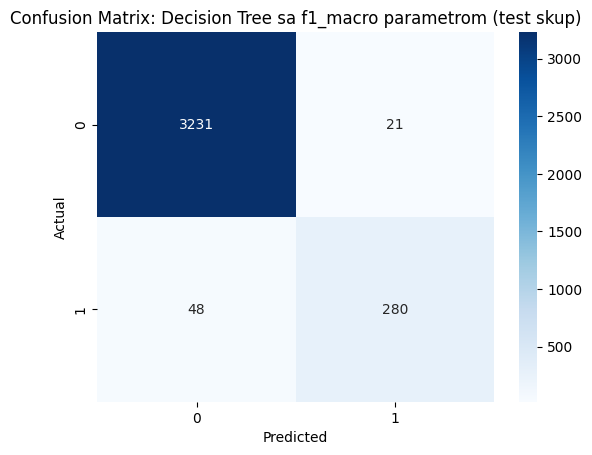

0.9807262569832402

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro', verbose=2)
grid_dt.fit(X_train_scaled, y_train)

evaluate_model(grid_dt.best_estimator_, X_test_scaled, y_test, "Decision Tree sa f1_macro parametrom (test skup)")

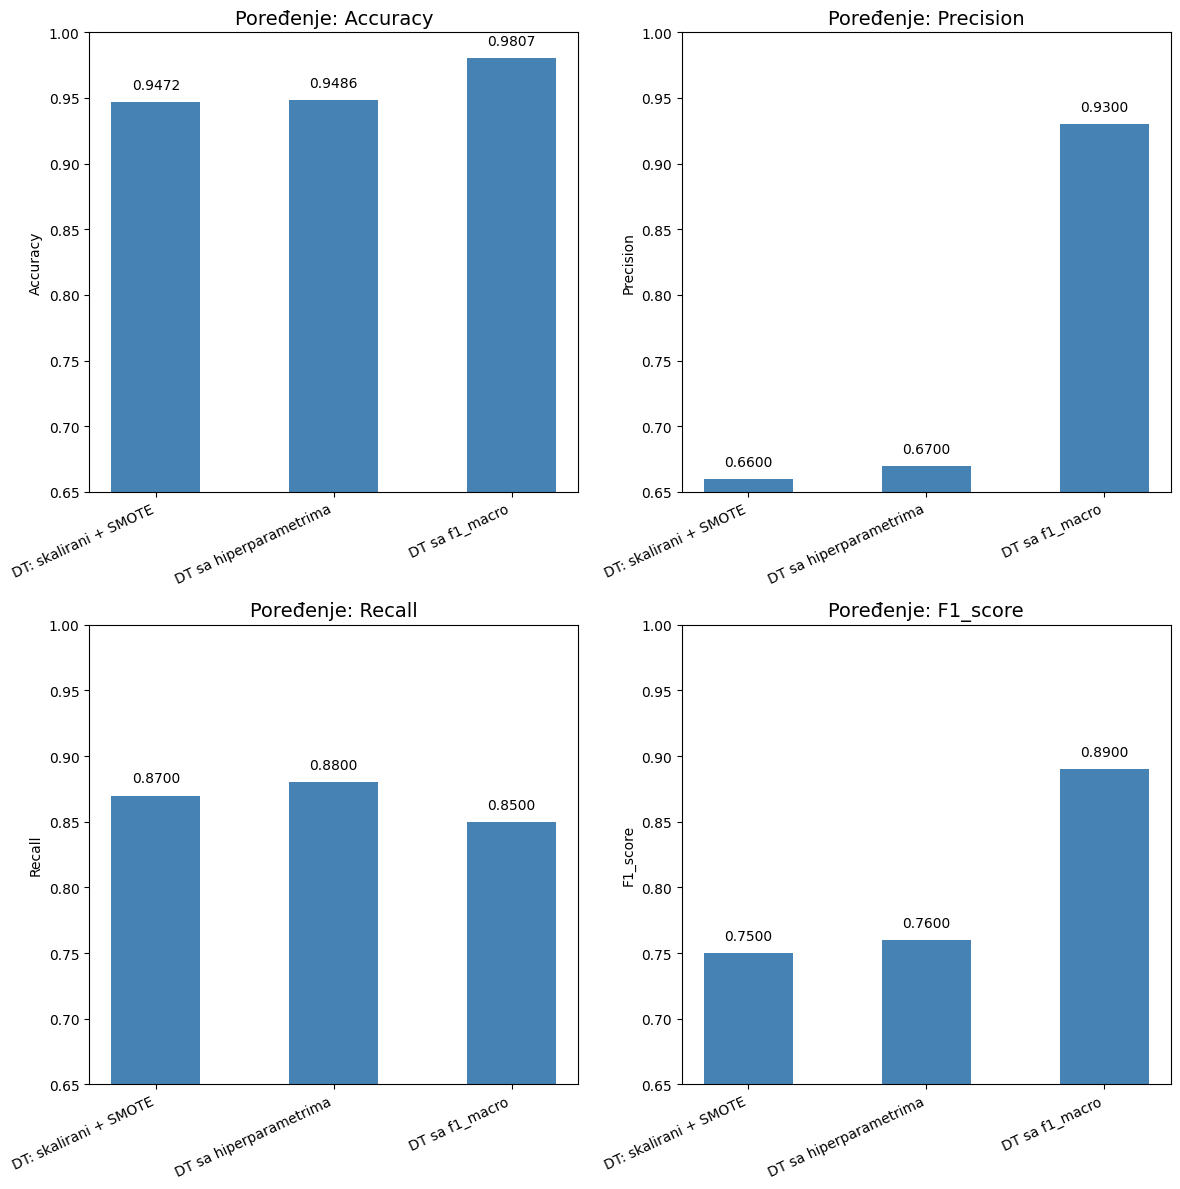

In [ ]:
dt_models = [
    "DT: skalirani + SMOTE",
    "DT sa hiperparametrima",
    "DT sa f1_macro"
]

results_dt = {
    'accuracy': [0.9472, 0.9486, 0.9807],
    'precision': [0.66, 0.67, 0.93],
    'recall':     [0.87, 0.88, 0.85],
    'f1_score':   [0.75, 0.76, 0.89]
}

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(dt_models))
bar_width = 0.5

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x, results_dt[metric], width=bar_width, color='steelblue')
    for idx, val in enumerate(results_dt[metric]):
      ax.text(idx, val + 0.01, f"{val:.4f}", ha='center', fontsize=10)
    ax.set_title(f'Poređenje: {metric.capitalize()}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(dt_models, rotation=25, ha='right')
    ax.set_ylim(0.65, 1.0)
    ax.set_ylabel(metric.capitalize())


plt.tight_layout()
plt.show()

# Random Forest algoritam

Random Forest je algoritam sličan Decision Tree algoritmu. On je, kao i prethodni, baziran na stablima odlučivanja. Ovaj algoritam kombinuje rezultate više stabala kako bi dobio jedan konačni rezultat.  


Model: Random Forest: skalirani + SMOTE (test skup)
Tačnost: 0.9751396648044692
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3252
           1       0.84      0.90      0.87       328

    accuracy                           0.98      3580
   macro avg       0.92      0.94      0.93      3580
weighted avg       0.98      0.98      0.98      3580



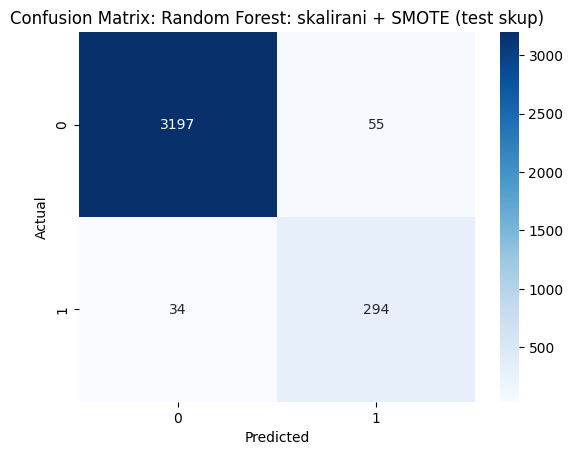

0.9751396648044692

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest: skalirani + SMOTE (test skup)")

# Random Forest Hyperparameter tuning (GridSearchCV)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Model: Random Forest sa hiperparametrima (test skup)
Tačnost: 0.9743016759776536
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3252
           1       0.84      0.89      0.86       328

    accuracy                           0.97      3580
   macro avg       0.91      0.94      0.93      3580
weighted avg       0.98      0.97      0.97      3580



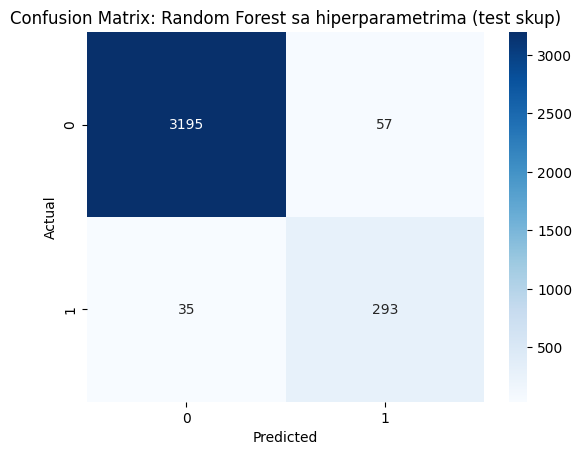

0.9743016759776536

In [ ]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}

grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                             param_distributions=param_grid,
                             n_iter=20,
                             scoring='f1_macro',
                             cv=3,
                             verbose=2,
                             n_jobs=-1,
                             random_state=42)

grid_rf.fit(X_train_bal, y_train_bal)

evaluate_model(grid_rf.best_estimator_, X_test_scaled, y_test, "Random Forest sa hiperparametrima (test skup)")

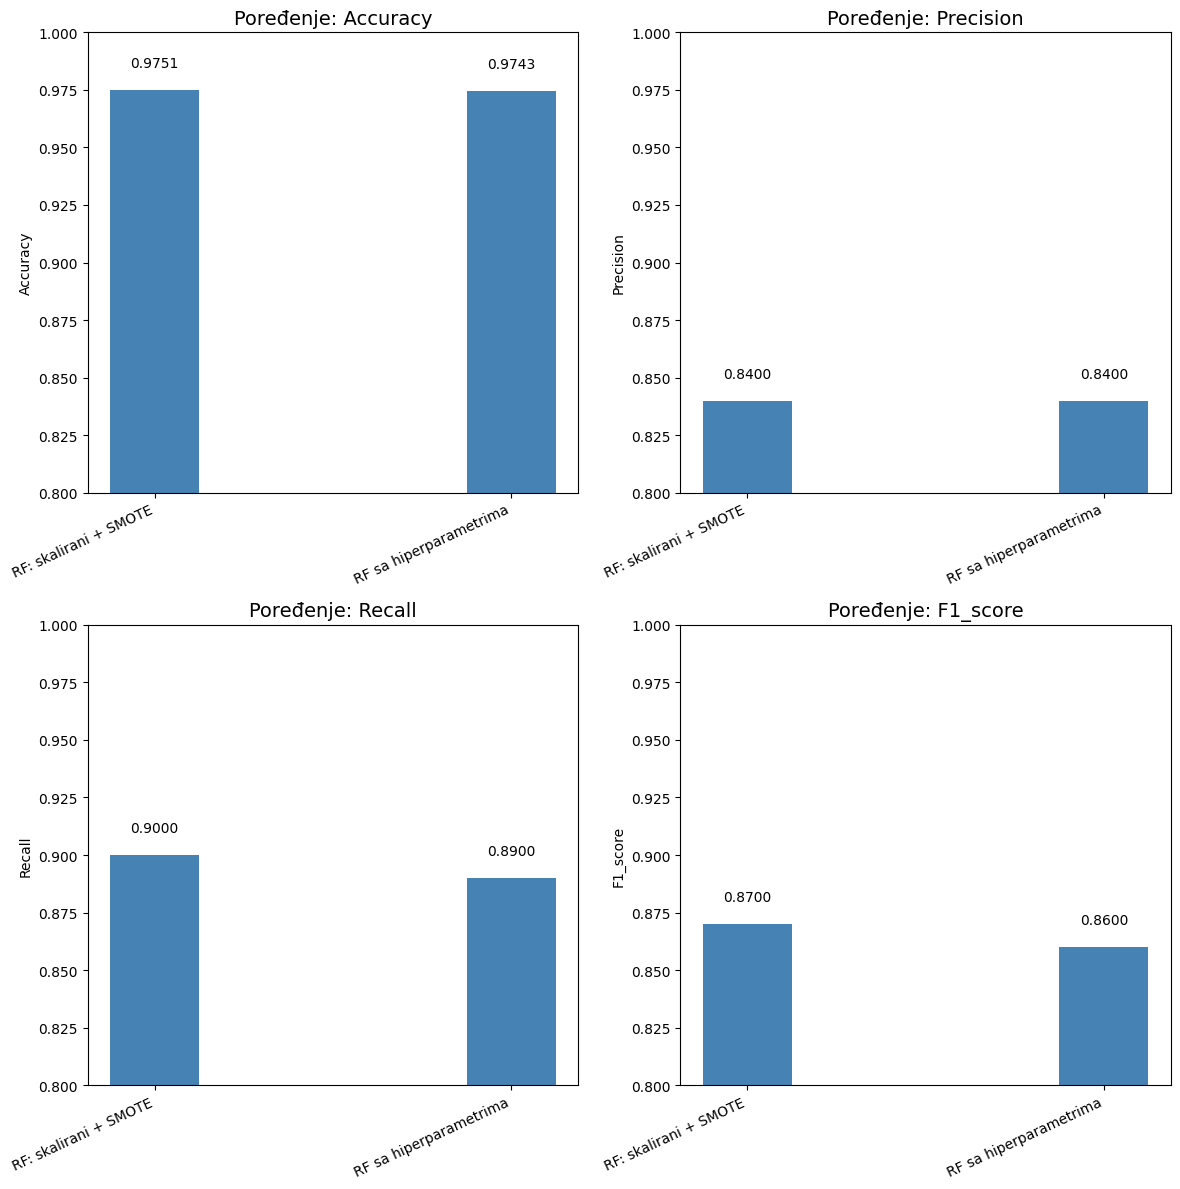

In [ ]:
rf_models = [
    "RF: skalirani + SMOTE",
    "RF sa hiperparametrima",
]

results_rf = {
    'accuracy': [0.9751, 0.9743],
    'precision': [0.84, 0.84],
    'recall':     [0.90, 0.89],
    'f1_score':   [0.87, 0.86]
}

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(rf_models))
bar_width = 0.25

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x, results_rf[metric], width=bar_width, color='steelblue')
    for idx, val in enumerate(results_rf[metric]):
      ax.text(idx, val + 0.01, f"{val:.4f}", ha='center', fontsize=10)
    ax.set_title(f'Poređenje: {metric.capitalize()}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(rf_models, rotation=25, ha='right')
    ax.set_ylim(0.8, 1.0)
    ax.set_ylabel(metric.capitalize())


plt.tight_layout()
plt.show()

# Logistic Regression

Regression algoritam koristi se za binarnu klasifikaciju. Njegova glavna karakteristika je primjena sigmoidne funkcije, koja svaku realnu vrijednost transformiše u interval između 0 i 1. Rezultat algoritma predstavlja vjerovatnoću da instanca pripada pozitivnoj klasi. Na osnovu te vjerovatnoće, model donosi klasifikacionu odluku (npr. ako je vjerovatnoća veća od 0.5, klasa je 1, u suprotnom 0).


Model: Logistic Regression: skalirani + SMOTE (test skup)
Tačnost: 0.9687150837988827
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.78      0.92      0.84       328

    accuracy                           0.97      3580
   macro avg       0.89      0.95      0.91      3580
weighted avg       0.97      0.97      0.97      3580



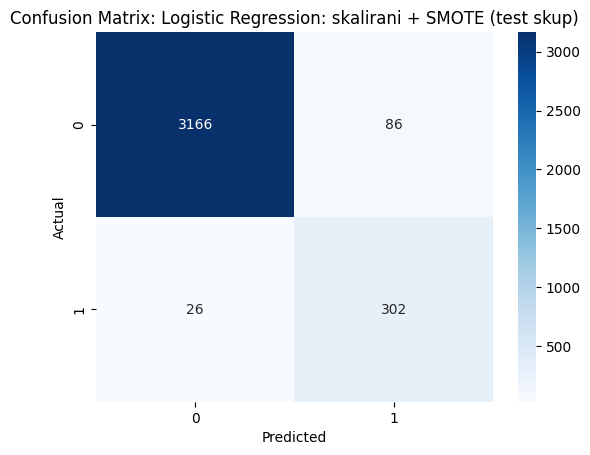

0.9687150837988827

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression: skalirani + SMOTE (test skup)")

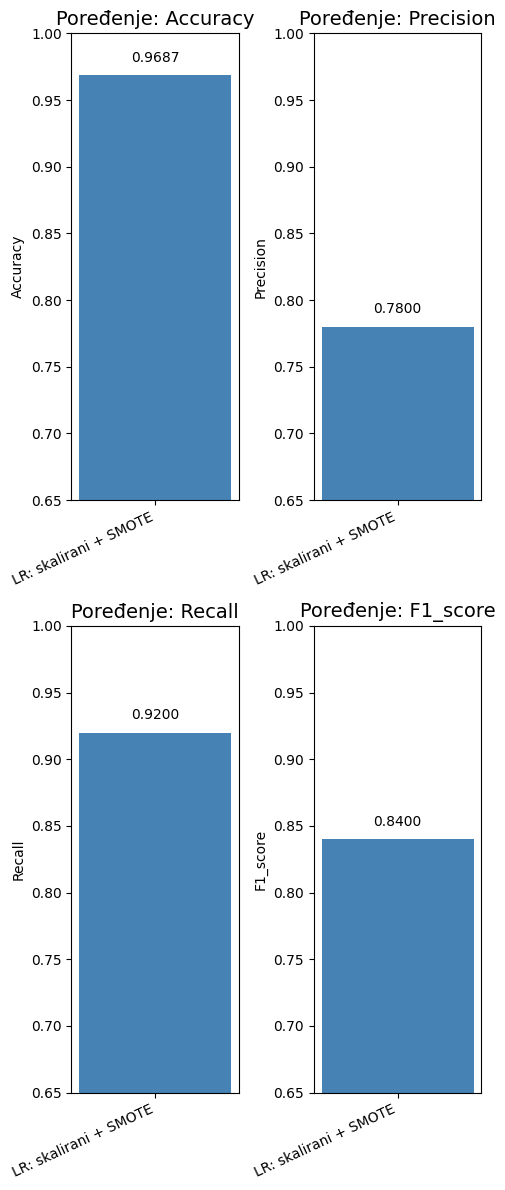

In [ ]:
lr_models = [
    "LR: skalirani + SMOTE",
]

results_lr = {
    'accuracy': [0.9687],
    'precision': [0.78],
    'recall':     [0.92],
    'f1_score':   [0.84]
}

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(lr_models))
bar_width = 0.2

fig, axs = plt.subplots(2, 2, figsize=(5, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x, results_lr[metric], width=bar_width, color='steelblue')
    for idx, val in enumerate(results_lr[metric]):
      ax.text(idx, val + 0.01, f"{val:.4f}", ha='center', fontsize=10)
    ax.set_title(f'Poređenje: {metric.capitalize()}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(lr_models, rotation=25, ha='right')
    ax.set_ylim(0.65, 1.0)
    ax.set_ylabel(metric.capitalize())


plt.tight_layout()
plt.show()

# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) je algoritam za klasifikaciju koji klasifikuje instancu na osnovu većine njenih K najbližih susjeda u prostoru karakteristika. Ne pravi eksplicitan model, već čuva sve podatke iz trening skupa i koristi udaljenost da pronađe susjede. Glavna ideja je da se slični podaci nalaze blizu jedni drugih.


Model: KNN: skalirani + SMOTE (test skup)test skup)
Tačnost: 0.9477653631284916
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3252
           1       0.65      0.91      0.76       328

    accuracy                           0.95      3580
   macro avg       0.82      0.93      0.87      3580
weighted avg       0.96      0.95      0.95      3580



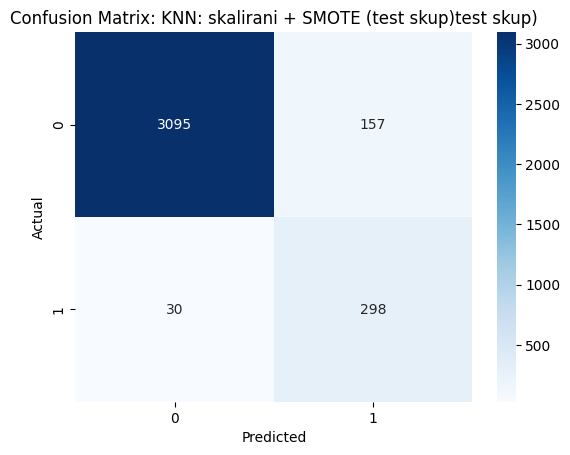

0.9477653631284916

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_bal, y_train_bal)

evaluate_model(knn_model, X_test_scaled, y_test, "KNN: skalirani + SMOTE (test skup)test skup)")

# K-Nearest Neighbors Hyperparameter tuning (GridSearchCV)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Model: KNN sa hiperparametrima (test skup)
Tačnost: 0.95
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3252
           1       0.67      0.90      0.77       328

    accuracy                           0.95      3580
   macro avg       0.83      0.93      0.87      3580
weighted avg       0.96      0.95      0.95      3580



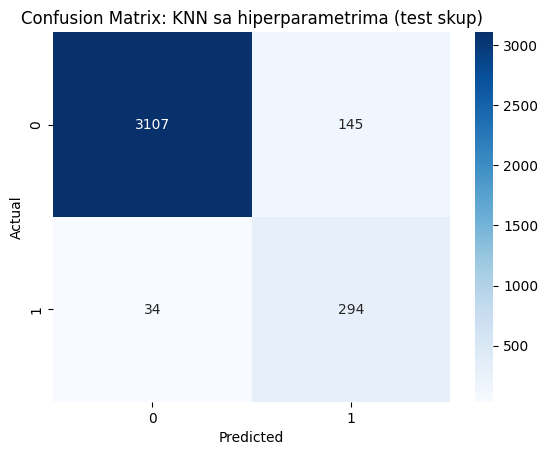

Najbolji hiperparametri za KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)

grid_knn.fit(X_train_bal, y_train_bal)

evaluate_model(grid_knn.best_estimator_, X_test_scaled, y_test, "KNN sa hiperparametrima (test skup)")

print("Najbolji hiperparametri za KNN:", grid_knn.best_params_)

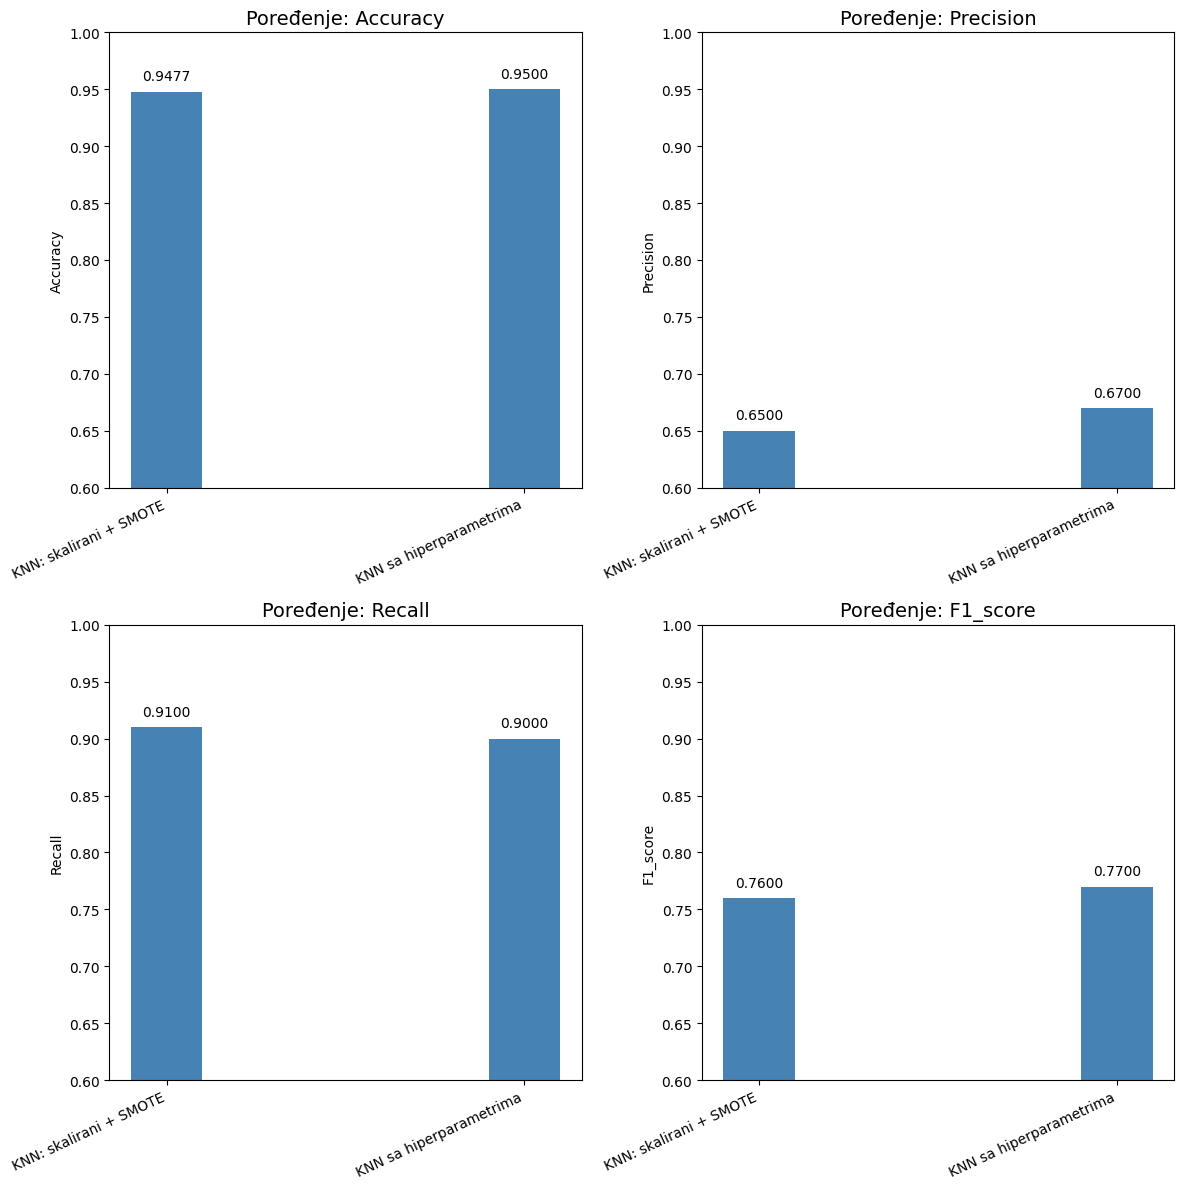

In [ ]:
knn_models = [
    "KNN: skalirani + SMOTE",
    "KNN sa hiperparametrima"
]

results_knn = {
    'accuracy': [0.9477, 0.95],
    'precision': [0.65, 0.67],
    'recall':     [0.91, 0.9],
    'f1_score':   [0.76, 0.77]
}

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(knn_models))
bar_width = 0.2

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x, results_knn[metric], width=bar_width, color='steelblue')
    for idx, val in enumerate(results_knn[metric]):
      ax.text(idx, val + 0.01, f"{val:.4f}", ha='center', fontsize=10)
    ax.set_title(f'Poređenje: {metric.capitalize()}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(knn_models, rotation=25, ha='right')
    ax.set_ylim(0.6, 1.0)
    ax.set_ylabel(metric.capitalize())


plt.tight_layout()
plt.show()

# XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:55:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost: skalirani + SMOTE (test skup)
Tačnost: 0.9692737430167597
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3252
           1       0.79      0.91      0.84       328

    accuracy                           0.97      3580
   macro avg       0.89      0.94      0.91      3580
weighted avg       0.97      0.97      0.97      3580



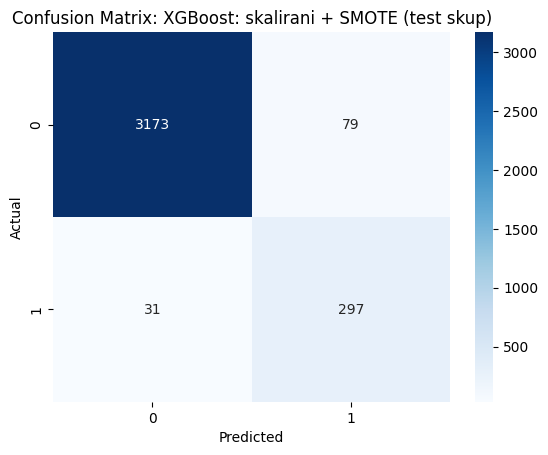

0.9692737430167597

In [ ]:
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgboost_model.fit(X_train_bal, y_train_bal)

evaluate_model(xgboost_model, X_test_scaled, y_test, "XGBoost: skalirani + SMOTE (test skup)")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:55:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost sa scale_pos_weight parametrom
Tačnost: 0.975977653631285
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3252
           1       0.85      0.90      0.87       328

    accuracy                           0.98      3580
   macro avg       0.92      0.94      0.93      3580
weighted avg       0.98      0.98      0.98      3580



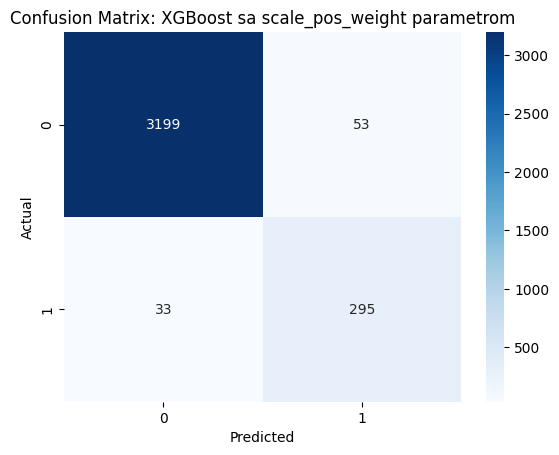

0.975977653631285

In [ ]:
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=13.4)

xgboost_model.fit(X_train_scaled, y_train)

evaluate_model(xgboost_model, X_test_scaled, y_test, "XGBoost sa scale_pos_weight parametrom")

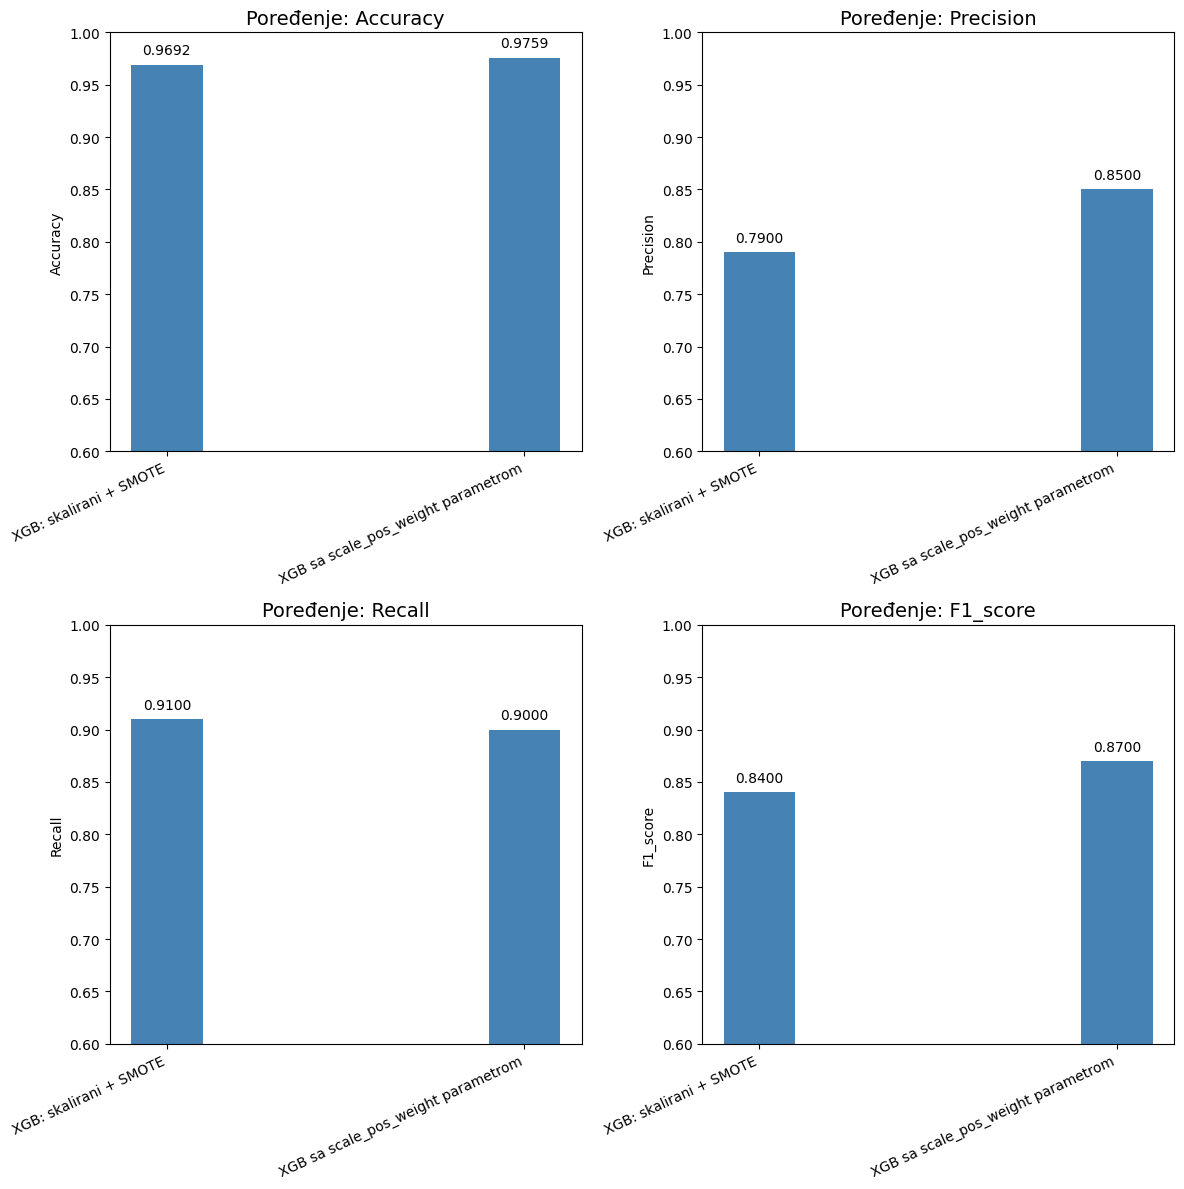

In [ ]:
xgb_models = [
    "XGB: skalirani + SMOTE",
    "XGB sa scale_pos_weight parametrom"
]

results_xgb = {
    'accuracy': [0.9692, 0.9759],
    'precision': [0.79, 0.85],
    'recall':     [0.91, 0.90],
    'f1_score':   [0.84, 0.87]
}

metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(xgb_models))
bar_width = 0.2

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.bar(x, results_xgb[metric], width=bar_width, color='steelblue')
    for idx, val in enumerate(results_xgb[metric]):
      ax.text(idx, val + 0.01, f"{val:.4f}", ha='center', fontsize=10)
    ax.set_title(f'Poređenje: {metric.capitalize()}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(xgb_models, rotation=25, ha='right')
    ax.set_ylim(0.6, 1.0)
    ax.set_ylabel(metric.capitalize())


plt.tight_layout()
plt.show()

#Neuronska mreža

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8746 - loss: 0.3308 - val_accuracy: 0.9118 - val_loss: 0.2613
Epoch 2/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9464 - loss: 0.1799 - val_accuracy: 0.9143 - val_loss: 0.2275
Epoch 3/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9511 - loss: 0.1640 - val_accuracy: 0.9208 - val_loss: 0.2180
Epoch 4/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9551 - loss: 0.1501 - val_accuracy: 0.9241 - val_loss: 0.2023
Epoch 5/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9526 - loss: 0.1572 - val_accuracy: 0.9229 - val_loss: 0.1983
Epoch 6/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9527 - loss: 0.1554 - val_accuracy: 0.9241 - val_loss: 0.1975
Epoch 7/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9559 - loss: 0.1487 - val_accuracy: 0.9106 - val_loss: 0.2295
Epoch 8/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9540 - loss: 0.1511 - val_accu

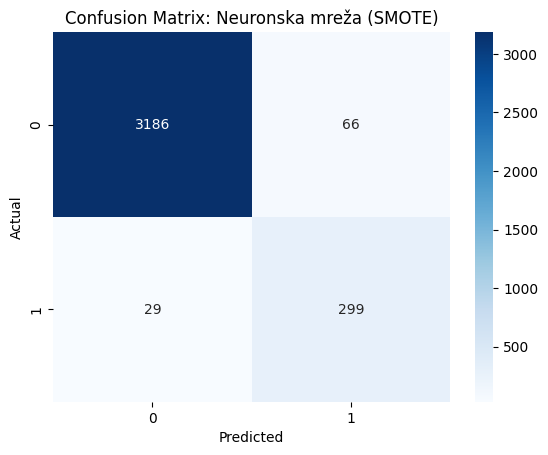

0.973463687150838

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_split=0.2
)

def evaluate_model(model, X, y, name):
    y_pred_probs = model.predict(X)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    acc = accuracy_score(y, y_pred)
    print(f"\nModel: {name}")
    print("Tačnost:", acc)
    print(classification_report(y, y_pred))

    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc

evaluate_model(model, X_test_scaled, y_test, "Neuronska mreža (SMOTE)")

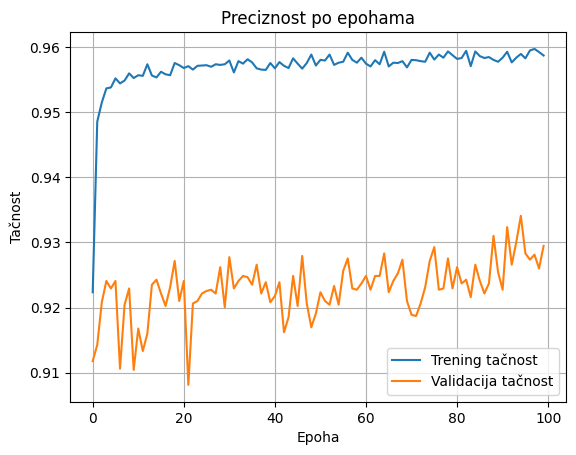

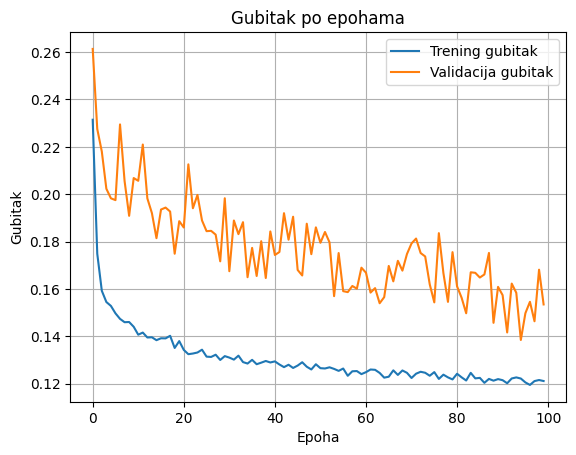

In [ ]:
plt.plot(history.history['accuracy'], label='Trening tačnost')
plt.plot(history.history['val_accuracy'], label='Validacija tačnost')
plt.xlabel('Epoha')
plt.ylabel('Tačnost')
plt.legend()
plt.title('Preciznost po epohama')
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Trening gubitak')
plt.plot(history.history['val_loss'], label='Validacija gubitak')
plt.xlabel('Epoha')
plt.ylabel('Gubitak')
plt.legend()
plt.title('Gubitak po epohama')
plt.grid()
plt.show()

Rezultati pokazuju da neuronska mreža vrlo brzo uči obrasce iz trening skupa, pri čemu tačnost već u ranim epohama prelazi 95%, a gubitak opada i stabilizuje se. Međutim, validaciona tačnost zaostaje za trening tačnošću i pokazuje veće oscilacije, dok se validacioni gubitak ne smanjuje istom dinamikom. Ovo ukazuje na pojavu overfittinga. Zaključujemo da se mreža previše prilagodila trening podacima i slabije generalizuje na nepoznate podatke.

Iako su ukupni rezultati zadovoljavajući, dodatna poboljšanja modela mogu se postići primjenom tehnika kao što su early stopping, povećanje regularizacije putem dropout-a, kao i dodatnim podešavanjem arhitekture mreže i hiperparametara. Također, povećanje količine podataka ili korištenje naprednijih neuronskih arhitektura može doprinijeti još boljim performansama modela.

#Zaključak
I na kraju uporedimo sve rezultate koje smo dobili na testnom skupu za sve tri faze.

Za treću fazu gdje smo imali više optimizacija odabrali smo najbolji rezultat i on je upisan u tabelu.


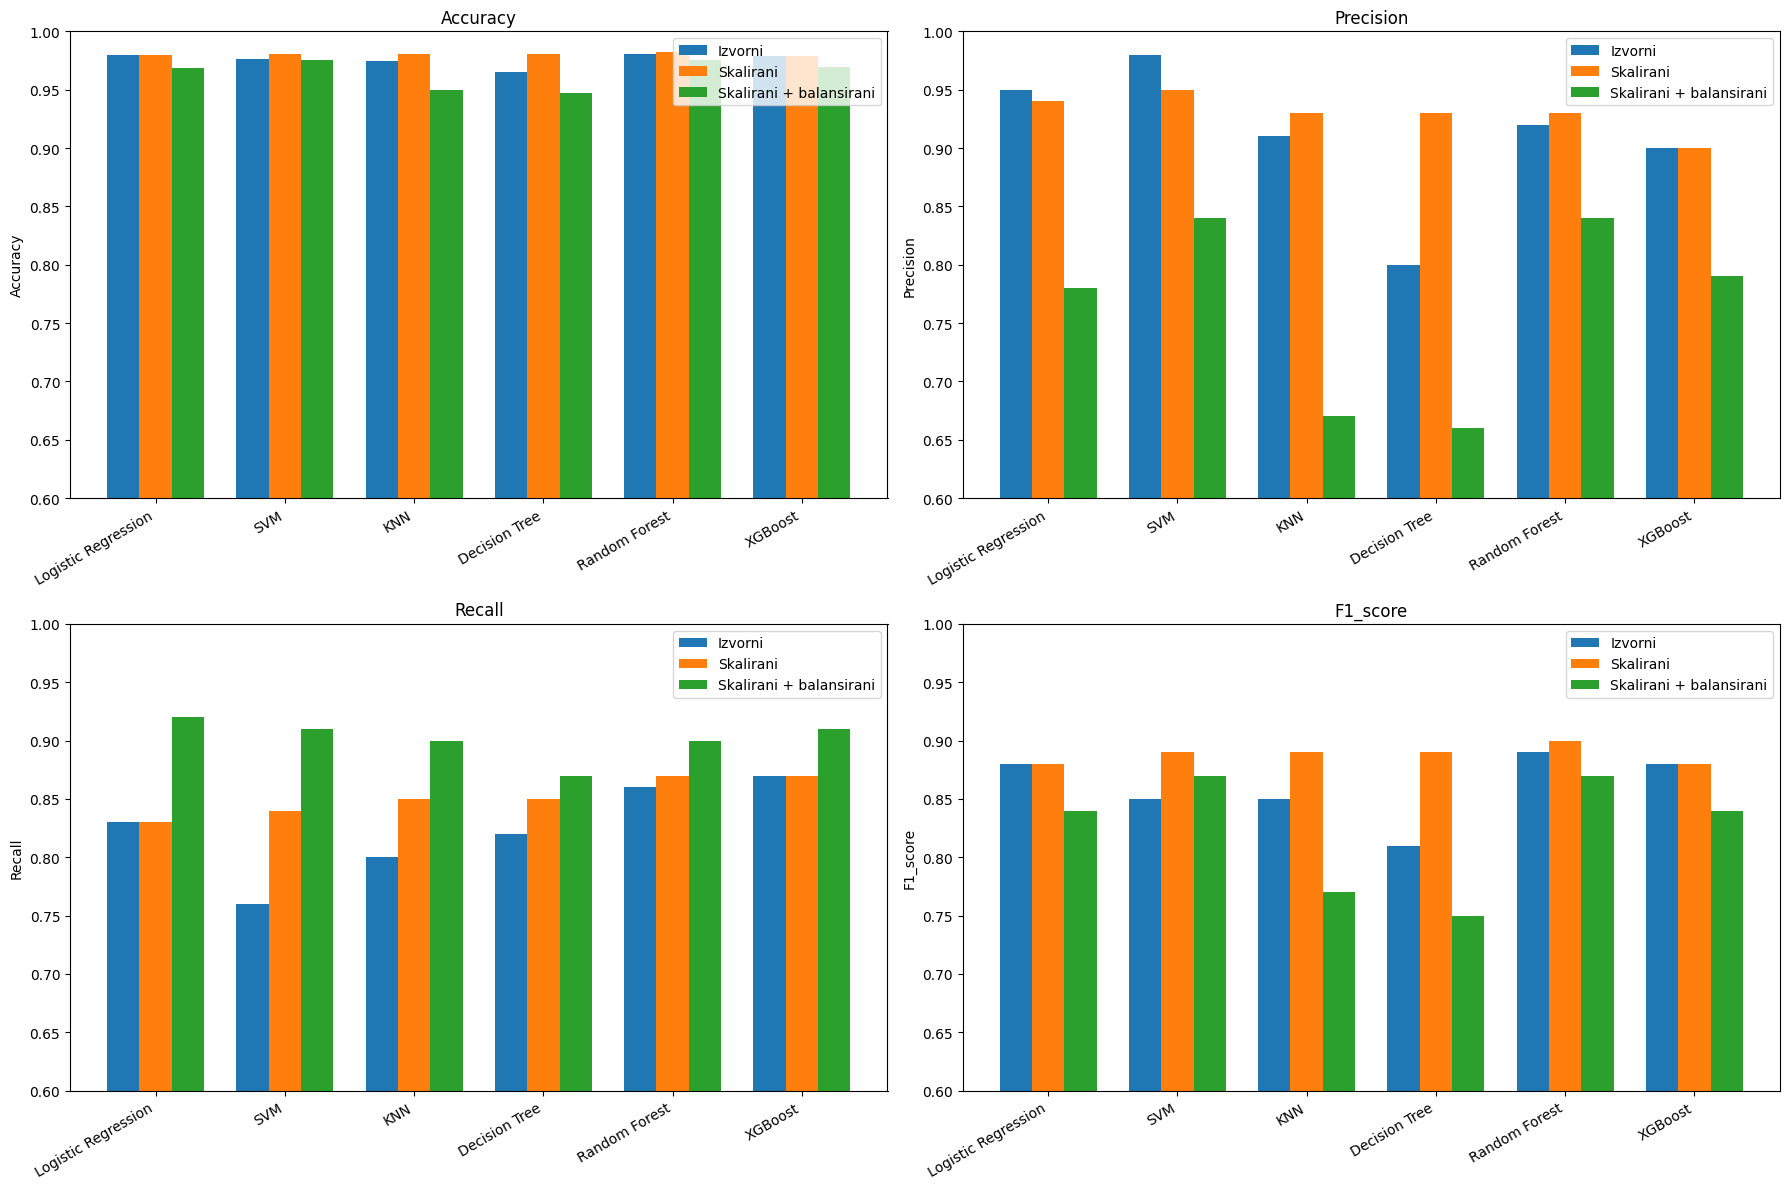

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
datasets = ['izvorni', 'skalirani', 'skalirani + balansirani']
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']


results = {
    'accuracy': {
        'izvorni':    [0.9798, 0.9762, 0.9743, 0.9648, 0.9807, 0.9787],
        'skalirani': [0.9796, 0.9807, 0.9804, 0.9807, 0.9821, 0.9787],
        'skalirani + balansirani':  [0.9687, 0.9756, 0.95,  0.9472, 0.9751, 0.9692]
    },
    'precision': {
        'izvorni':    [0.95, 0.98, 0.91, 0.80, 0.92, 0.90],
        'skalirani': [0.94,  0.95, 0.93, 0.93,  0.93, 0.90],
        'skalirani + balansirani':  [0.78, 0.84, 0.67, 0.66, 0.84, 0.79]
    },
    'recall': {
        'izvorni':    [0.83,  0.76, 0.80, 0.82,  0.86, 0.87],
        'skalirani': [0.83, 0.84, 0.85,  0.85, 0.87, 0.87],
        'skalirani + balansirani':  [0.92, 0.91,  0.90, 0.87, 0.90, 0.91]
    },
    'f1_score': {
        'izvorni':    [0.88, 0.85, 0.85, 0.81, 0.89, 0.88],
        'skalirani': [0.88, 0.89, 0.89, 0.89, 0.90, 0.88],
        'skalirani + balansirani':  [0.84, 0.87, 0.77, 0.75, 0.87, 0.84]
    }
}

bar_width = 0.25
x = np.arange(len(algorithms))

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]


    ax.bar(x - bar_width, results[metric]['izvorni'], width=bar_width, label='Izvorni')
    ax.bar(x, results[metric]['skalirani'], width=bar_width, label='Skalirani')
    ax.bar(x + bar_width, results[metric]['skalirani + balansirani'], width=bar_width, label='Skalirani + balansirani')

    ax.set_title(f'{metric.capitalize()}')
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms, rotation=30, ha='right')
    ax.set_ylim(0.6, 1.0)
    ax.set_ylabel(metric.capitalize())
    ax.legend()

plt.tight_layout()
plt.show()


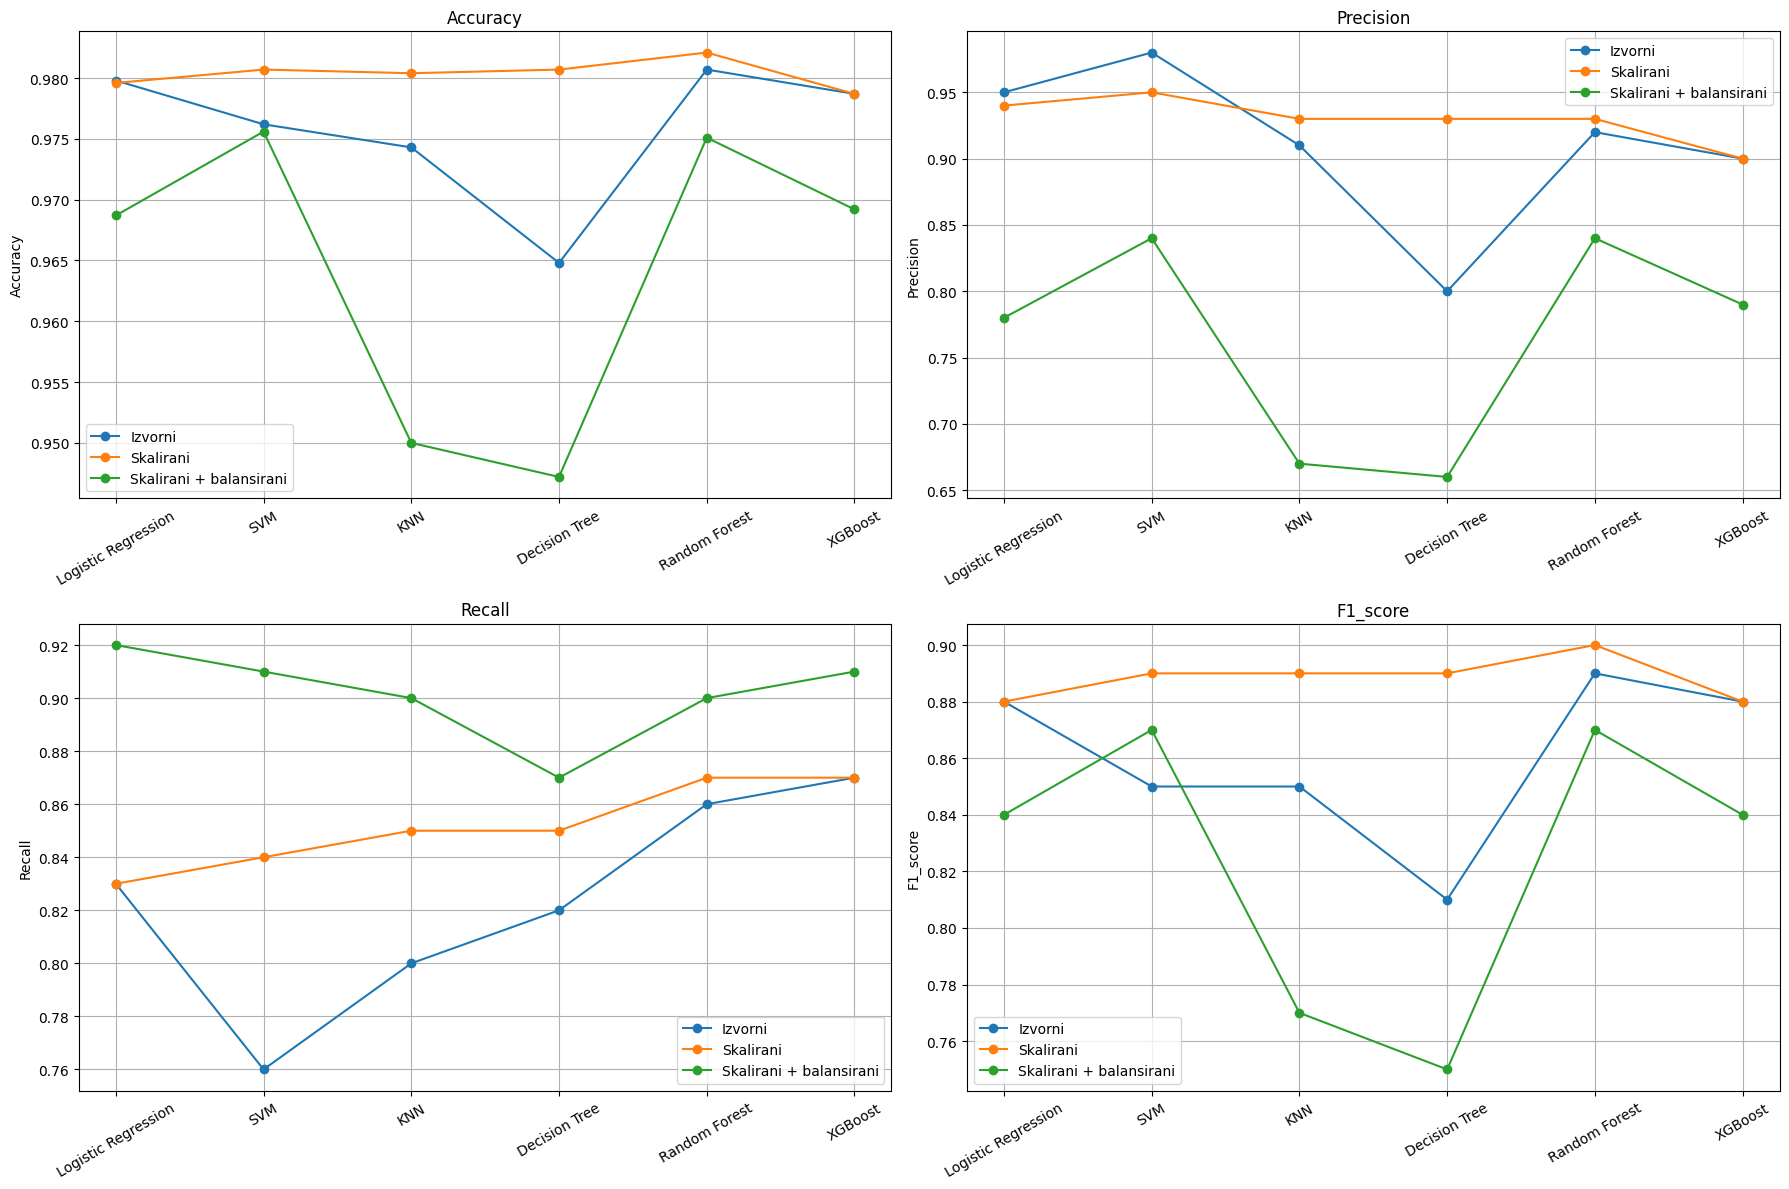

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    for dataset in datasets:
        ax.plot(algorithms, results[metric][dataset], marker='o', label=dataset.capitalize())
    ax.set_title(f'{metric.capitalize()}')
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(range(len(algorithms)))
    ax.set_xticklabels(algorithms, rotation=30)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

#Zaključak

Kao što vidimo na većini algoritama primjenili smo slične metode uz dosta različite rezultate. Ipak neke su i malo očekivane zbog toga što svi algoritmi imaju svoje primjene. Iz SVM modela možemo zaključiti da je skaliranje imalo jako velik uticaj na krajnji rezultat, jer kao što je već poznato algoritam zavisi od udaljenosti među tačkama, a skaliranjem ih sve zbližimo rasponom od 0 do 1. Pored toga vidimo da nije došlo do overfittinga što je od velikog značaja i da model nema previše propusta kod određivanja pulsara, ni puno lažnih pozitivnih pulsara

Što se tiče Decision Tree, XGBoost i Random Forest algoritama važe slične stvari. Oni ne zavise od udaljenosti između uzoraka tako da ne dolazi do ikakvih poboljšanja skaliranjem. Činjenica da preprocesiranje nije imalo velikog uticaja nam ne govori ništa o algoritmima već da je sami skup bio poprilično čist od samog početka. Sve u svemu jasno je da su konzistentno pokazali dobro rezultate.

Logistic Regression je linearan model pa je bilo za očekivat da neće imati sjajne performanse u ovoj primjeni. Iz rezultata tj. preciznosti vidimo da postoji underfitting i da ima dosta lažnih pozitivnih rezultata. Mada u poređenju sa nekim drugim modelima i nije toliko loše.

Za KNN vidimo jako dobar Recall ali i prenisku preciznost što dovodi do zaključka da je algoritam davao puno pozitivnih rezultata od kojih većina su bili lažni. Iako je korišteno preprocesiranje podataka zajedno sa podešavanjem parametara, algoritam daje nezadovoljavajuće rezultate.

Uz malo više očekivanja od neuralnih mreža, postignuti rezultati nisu zadivljujući, poprilično su slični kao kod KNN-a. Preprocesiranje je skoro pa mandatorno za ovaj pristup  ali ono opet nije toliko pomoglo. Jedna od opcija je više pokušaja sa podešavanjem parametara modela dok se pronađe njihova optimalna kombinacija, dok je druga da mreža nije imala dovoljno uzoraka, a proširivanje seta što nije trenutno moguće. Kao što je prethodno spomenuto imali smo približno 18000 uzoraka, 9 klasa i problem neuravnoteženosti koji smo rješili SMOTE-om sa sigurnošću bi se moglo reći da je prva opcija možda ona tačnija.

